In [11]:
# pip install pymechkar
# pip install matplotlib
# conda install -c anaconda pandas-profiling
# pip install autoviz
# pip install sweetviz
# pip install fancyimpute
# https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
# https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
# https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
# https://docs.dataprep.ai/user_guide/eda/plot_missing.html
# https://www.kaggle.com/dansbecker/handling-missing-values
# !pip install fancyimpute
# pip install fancyimpute
# pip install --upgrade pip setuptools wheel

In [410]:
import pyodbc
import copy
from sqlalchemy import create_engine
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import warnings
import copy
# import fancyimpute
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display
import sweetviz as sv
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
# from fancyimpute import MICE
%matplotlib inline 
sns.set(color_codes=True)

In [263]:
driver_name = "SQL Server Native Client 11.0"
server = "LAPTOP-ELIRANT\SQLEXPRESS"  # change with your server name
dbname = "BoxOffice"

dbstring = """'Driver={%s};'
              'Server=%s;'
              'Database=%s;'
              'Trusted_Connection=yes;'""" % (driver_name, server, dbname)

In [264]:
conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))

In [265]:
df = pd.read_sql_query('SELECT * FROM final_table',conn)
df

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
0,1,14000000,0,en,1,Hot Tub Time Machine 2,6.575393,High,2/20/15,2015.0,...,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,0.0,13.0
1,2,40000000,0,en,1,The Princess Diaries 2: Royal Engagement,8.248895,High,8/6/04,2004.0,...,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,4.0,4.0
2,3,3300000,1,en,1,Whiplash,64.299988,Superb,10/10/14,2014.0,...,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,4.0,11.0
3,4,1200000,1,hi,0,Kahaani,3.174936,Medium,3/9/12,2012.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,0,ko,0,????,1.148070,Low,2/5/09,2009.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,7394,42000000,0,en,1,Original Sin,9.970359,Superb,8/3/01,2001.0,...,0.0,1.0,1.0,0.0,3.0,2.0,0.0,3.0,3.0,7.0
7394,7395,19000000,0,en,1,Without a Paddle,6.046516,High,8/20/04,2004.0,...,16.0,4.0,9.0,2.0,13.0,16.0,7.0,6.0,7.0,22.0
7395,7396,16000000,0,en,1,The Verdict,9.596883,Superb,12/8/82,1982.0,...,0.0,1.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,9.0
7396,7397,2000000,0,en,1,It Follows,20.359337,Superb,2/4/15,2015.0,...,2.0,2.0,3.0,1.0,6.0,2.0,4.0,1.0,0.0,6.0


In [266]:
categorical_update = [
  'homepage', 'original_language', 'original_is_en', 
    'popularity_cat', 'best_seller','Action', 'Adventure',
    'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
    'Thriller', 'TV Movie', 'War', 'Western','en',
    'fr', 'es', 'de', 'ru', 'it', 'ja']

for col in categorical_update:
    df[col] = pd.Categorical(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    7398 non-null   int64   
 1   budget                7398 non-null   int64   
 2   homepage              7398 non-null   category
 3   original_language     7398 non-null   category
 4   original_is_en        7398 non-null   category
 5   original_title        7398 non-null   object  
 6   popularity            7398 non-null   float64 
 7   popularity_cat        7398 non-null   category
 8   release_date          7397 non-null   object  
 9   year                  7397 non-null   float64 
 10  month                 7397 non-null   float64 
 11  runtime               7392 non-null   float64 
 12  revenue               3000 non-null   float64 
 13  best_seller           7398 non-null   category
 14  revenue_rank          7398 non-null   int64   
 15  year

In [267]:
# Exploratory data analysis

In [268]:
df.head()

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
0,1,14000000,0,en,1,Hot Tub Time Machine 2,6.575393,High,2/20/15,2015.0,...,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,0.0,13.0
1,2,40000000,0,en,1,The Princess Diaries 2: Royal Engagement,8.248895,High,8/6/04,2004.0,...,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,4.0,4.0
2,3,3300000,1,en,1,Whiplash,64.299988,Superb,10/10/14,2014.0,...,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,4.0,11.0
3,4,1200000,1,hi,0,Kahaani,3.174936,Medium,3/9/12,2012.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,0,ko,0,????,1.148070,Low,2/5/09,2009.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    7398 non-null   int64   
 1   budget                7398 non-null   int64   
 2   homepage              7398 non-null   category
 3   original_language     7398 non-null   category
 4   original_is_en        7398 non-null   category
 5   original_title        7398 non-null   object  
 6   popularity            7398 non-null   float64 
 7   popularity_cat        7398 non-null   category
 8   release_date          7397 non-null   object  
 9   year                  7397 non-null   float64 
 10  month                 7397 non-null   float64 
 11  runtime               7392 non-null   float64 
 12  revenue               3000 non-null   float64 
 13  best_seller           7398 non-null   category
 14  revenue_rank          7398 non-null   int64   
 15  year

In [270]:
# # Rows containing duplicate data
# duplicate_rows_df = df[df.duplicated()]
# print('number of duplicate rows: ', duplicate_rows_df.shape)

In [271]:
# Dropping the duplicates 
# df = df.drop_duplicates()
# df.head(5)

In [272]:
# # Counting the number of rows after removing duplicates.
# df.count()

In [273]:
df.dtypes

id                         int64
budget                     int64
homepage                category
original_language       category
original_is_en          category
original_title            object
popularity               float64
popularity_cat          category
release_date              object
year                     float64
month                    float64
runtime                  float64
revenue                  float64
best_seller             category
revenue_rank               int64
yearly_revenue_sum       float64
revenue_year_percent     float64
rev_budg_ratio           float64
Action                  category
Adventure               category
Animation               category
Comedy                  category
Crime                   category
Documentary             category
Drama                   category
Family                  category
Fantasy                 category
Foreign                 category
History                 category
Horror                  category
Music     

In [274]:
# 1.	תתארו את הנתונים עם סטטיסטיקה תיאורית (תשתמשו במדדי מירכוז ופיזור) 

In [275]:
df.describe()

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,7.398000e+03,7.398000e+03,7397.000000,7397.000000,7392.000000,3.000000e+03,7398.000000,7.378000e+03,3000.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,3699.500000,2.260146e+07,8.514968e+00,2001.218197,6.842909,107.717262,6.672585e+07,66.124899,1.749065e+10,1.195270,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.095652,8.251495
std,2135.762978,3.694867e+07,1.216579e+01,14.006854,3.386287,21.480040,1.375323e+08,42.637156,1.042479e+10,4.867114,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.626412,6.635825
min,1.000000,0.000000e+00,1.000000e-06,1950.000000,1.000000,0.000000,1.000000e+00,1.000000,2.382000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,0.000000e+00,3.933124e+00,1993.000000,4.000000,94.000000,2.379808e+06,28.000000,7.851833e+09,0.020000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,7.500000e+06,7.435844e+00,2005.000000,7.000000,104.000000,1.680707e+07,63.000000,2.160382e+10,0.150000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,2.800000e+07,1.092000e+01,2011.000000,10.000000,118.000000,6.891920e+07,106.000000,2.524264e+10,0.670000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000
max,7398.000000,3.800000e+08,5.474883e+02,2049.000000,12.000000,338.000000,1.519558e+09,141.000000,3.556835e+10,100.000000,...,119.000000,30.000000,21.000000,18.000000,38.000000,40.000000,89.000000,23.000000,31.000000,91.000000


In [276]:
df.describe(include='object')

,original_title,release_date
count,7398,7397
unique,7048,4703
top,????,9/10/10
freq,52,10


In [277]:
df.describe(include='all')

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,7.398000e+03,7398.0,7398,7398.0,7398,7.398000e+03,7398,7397,7397.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
unique,NaN,NaN,2.0,44,2.0,7048,NaN,4,4703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,en,1.0,????,NaN,Superb,9/10/10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5032.0,6351,6351.0,52,NaN,2783,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3699.500000,2.260146e+07,NaN,NaN,NaN,NaN,8.514968e+00,NaN,NaN,2001.218197,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.095652,8.251495
std,2135.762978,3.694867e+07,NaN,NaN,NaN,NaN,1.216579e+01,NaN,NaN,14.006854,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.626412,6.635825
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e-06,NaN,NaN,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,0.000000e+00,NaN,NaN,NaN,NaN,3.933124e+00,NaN,NaN,1993.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,7.500000e+06,NaN,NaN,NaN,NaN,7.435844e+00,NaN,NaN,2005.000000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,2.800000e+07,NaN,NaN,NaN,NaN,1.092000e+01,NaN,NaN,2011.000000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'revenue_rank'}>,
        <AxesSubplot:title={'center':'yearly_revenue_sum'}>,
        <AxesSubplot:title={'center':'revenue_year_percent'}>],
       [<AxesSubplot:title={'center':'rev_budg_ratio'}>,
        <AxesSubplot:title={'center':'Art'}>,
        <AxesSubplot:title={'center':'Camera'}>,
        <AxesSubplot:title={'center':'Costume & Make-Up'}>,
        <AxesSubplot:title={'center':'Crew'}>],
       [<AxesSubplot:title={'center':'Directing'}>,
        <AxesSubplot:title={'center':'Editing'}>,
        <AxesSubplot:title={'center':'Lighting'}>,
        <AxesSubplot:title={'center':'Production'}>,
        <Ax

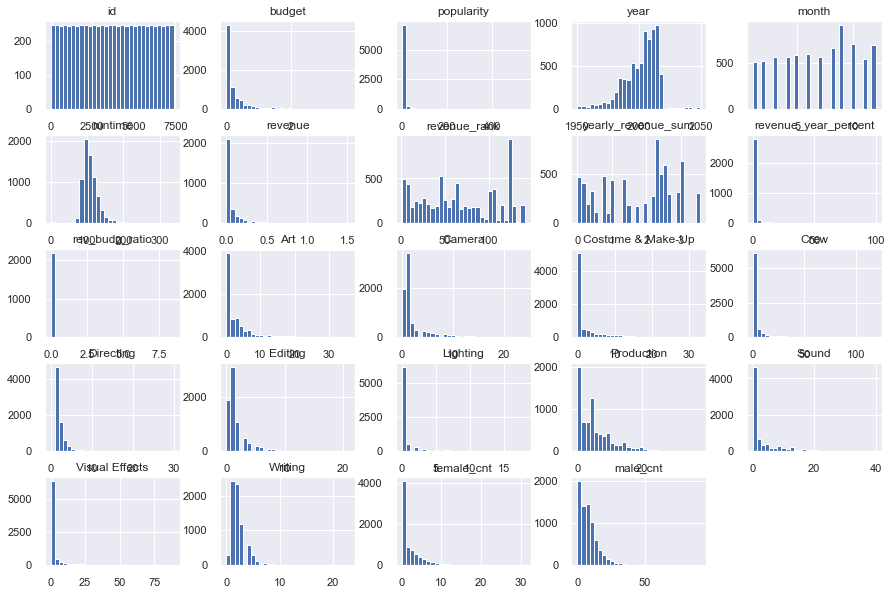

In [278]:
# 2.	תייצרו גרפים המתארים את ההתנהגות של כל משתנה. 
df.hist(bins=30, figsize=(15, 10))

In [279]:
# Concentration indices , Univariate analysis
df_desc = df.describe()
# Dispersion indices
df_desc

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,7.398000e+03,7.398000e+03,7397.000000,7397.000000,7392.000000,3.000000e+03,7398.000000,7.378000e+03,3000.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,3699.500000,2.260146e+07,8.514968e+00,2001.218197,6.842909,107.717262,6.672585e+07,66.124899,1.749065e+10,1.195270,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.095652,8.251495
std,2135.762978,3.694867e+07,1.216579e+01,14.006854,3.386287,21.480040,1.375323e+08,42.637156,1.042479e+10,4.867114,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.626412,6.635825
min,1.000000,0.000000e+00,1.000000e-06,1950.000000,1.000000,0.000000,1.000000e+00,1.000000,2.382000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,0.000000e+00,3.933124e+00,1993.000000,4.000000,94.000000,2.379808e+06,28.000000,7.851833e+09,0.020000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,7.500000e+06,7.435844e+00,2005.000000,7.000000,104.000000,1.680707e+07,63.000000,2.160382e+10,0.150000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,2.800000e+07,1.092000e+01,2011.000000,10.000000,118.000000,6.891920e+07,106.000000,2.524264e+10,0.670000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000
max,7398.000000,3.800000e+08,5.474883e+02,2049.000000,12.000000,338.000000,1.519558e+09,141.000000,3.556835e+10,100.000000,...,119.000000,30.000000,21.000000,18.000000,38.000000,40.000000,89.000000,23.000000,31.000000,91.000000


In [280]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
id,1.000000,0.000416,0.004630,-0.002626,0.015280,0.001971,0.008310,0.404904,0.000871,0.015251,-0.024396,-0.002674,-0.009075,-0.000098,-0.007883,0.000851,0.004440,-0.002027,0.001425,-0.003929,-0.001568,0.005602,-0.006365,-0.006012
budget,0.000416,1.000000,0.518921,0.122159,0.060617,0.250989,0.691231,-0.042655,0.144661,0.496018,-0.065661,0.393197,0.314279,0.329863,0.330814,0.266393,0.365480,0.285107,0.399648,0.357222,0.396728,0.273451,0.414902,0.523284
popularity,0.004630,0.518921,1.000000,0.109707,0.054342,0.171623,0.596192,-0.070451,0.109882,0.479293,0.282906,0.442749,0.415828,0.388605,0.359830,0.308900,0.448285,0.320014,0.472122,0.450054,0.386043,0.279638,0.430324,0.563011
year,-0.002626,0.122159,0.109707,1.000000,-0.037447,-0.003317,-0.034413,0.594850,0.878324,-0.318231,-0.094188,0.092130,0.023010,0.125658,0.152629,0.112537,0.017168,0.134745,0.182454,0.063170,0.208217,0.001116,0.130439,-0.080541
month,0.015280,0.060617,0.054342,-0.037447,1.000000,0.127177,0.034994,-0.012025,-0.028330,0.062917,0.011137,0.062888,0.045923,0.054001,0.019726,0.035899,0.053399,0.031183,0.039385,0.048372,0.020820,0.021809,0.065021,0.056900
runtime,0.001971,0.250989,0.171623,-0.003317,0.127177,1.000000,0.261572,-0.080125,-0.001224,0.241633,0.052580,0.202869,0.221629,0.220264,0.158172,0.084440,0.175157,0.132493,0.150488,0.201327,0.068802,0.105438,0.170157,0.200310
revenue,0.008310,0.691231,0.596192,-0.034413,0.034994,0.261572,1.000000,-0.700772,0.026302,0.829861,0.599589,0.387729,0.356693,0.336293,0.321740,0.262704,0.406150,0.289759,0.398575,0.392863,0.368895,0.276503,0.413608,0.558404
revenue_rank,0.404904,-0.042655,-0.070451,0.594850,-0.012025,-0.080125,-0.700772,1.000000,0.699143,-0.929040,-0.580874,-0.057059,-0.114587,-0.023282,-0.013153,-0.033329,-0.094943,0.011869,0.055402,-0.090390,0.045450,-0.124768,0.024895,-0.220803
yearly_revenue_sum,0.000871,0.144661,0.109882,0.878324,-0.028330,-0.001224,0.026302,0.699143,1.000000,-0.398075,-0.107815,0.074597,-0.005870,0.108231,0.127648,0.078044,0.013164,0.129725,0.203940,0.038935,0.204586,-0.043674,0.153070,-0.099910
revenue_year_percent,0.015251,0.496018,0.479293,-0.318231,0.062917,0.241633,0.829861,-0.929040,-0.398075,1.000000,0.637306,0.327566,0.333683,0.270432,0.244905,0.219805,0.349603,0.193141,0.234004,0.339963,0.238191,0.311134,0.253695,0.533096


<AxesSubplot:>

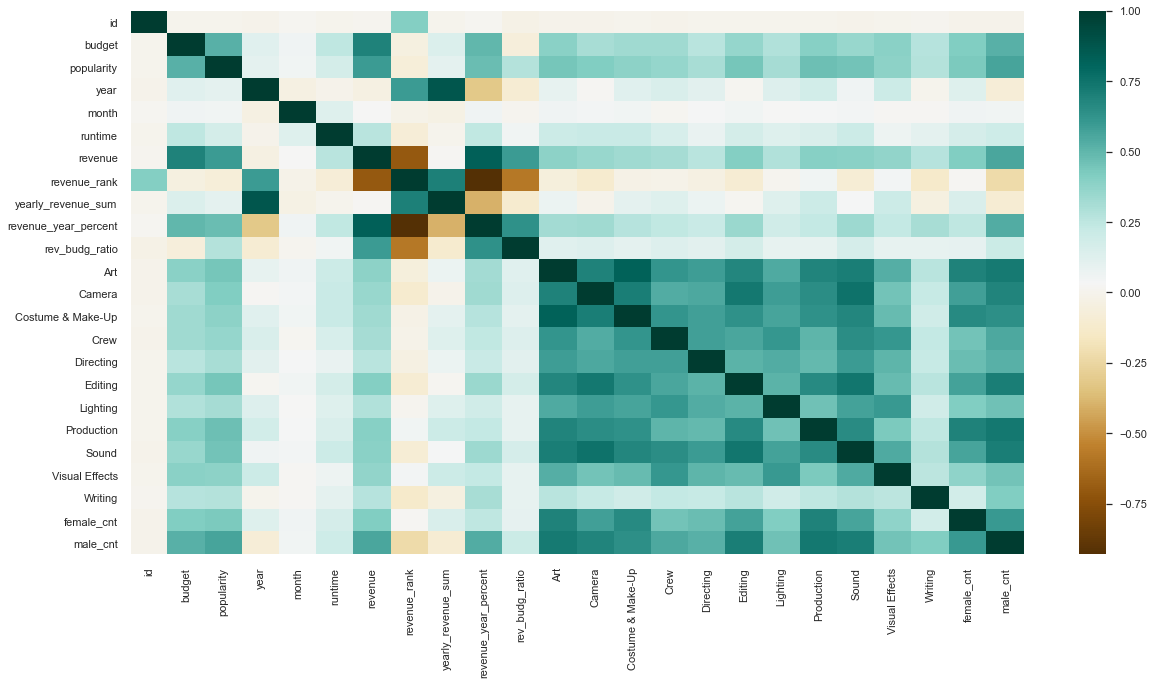

In [281]:
# Finding the relations between the variables.
# 3.	תייצרו מטריצה קורלציות והציגו אותה בגרף 
plt.figure(figsize=(20,10))
corrMatrix = df.corr(method = 'spearman')
sns.heatmap(corrMatrix ,cmap="BrBG", annot=False)

In [282]:
# 4.	תתארו את משתנה המטרה (revenue) - איך הוא מתפלג? האם יש קטגוריות שמראים שוני גדול התפלגות של משתנה המטרה?

def min_max_values(col):
    """The function takes the column name as the argument
    and returns the top & bottom observation in that dataframe
    """
    
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [283]:
min_max_values('revenue')

,1126,347
id,1127,348
budget,220000000,12
homepage,1,0
original_language,en,en
original_is_en,1,1
original_title,The Avengers,The Wind in the Willows
popularity,89.8876,1.41032
popularity_cat,Superb,Low
release_date,4/25/12,10/16/96
year,2012,1996


<AxesSubplot:xlabel='revenue'>

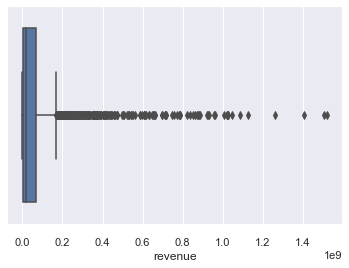

In [284]:
sns.boxplot(x=df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Count'>

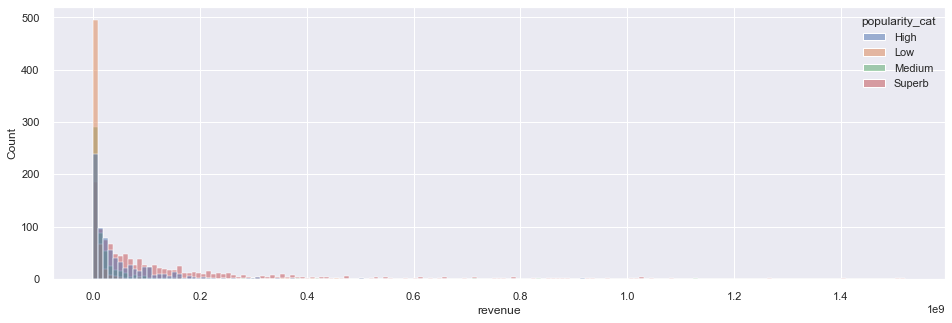

In [285]:
plt.figure(figsize=(16,5))
sns.histplot(x=df['revenue'],hue=df.popularity_cat)

(array([2.632e+03, 2.180e+02, 7.900e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([1.00000000e+00, 1.51955792e+08, 3.03911583e+08, 4.55867374e+08,
        6.07823165e+08, 7.59778956e+08, 9.11734746e+08, 1.06369054e+09,
        1.21564633e+09, 1.36760212e+09, 1.51955791e+09]),
 <BarContainer object of 10 artists>)

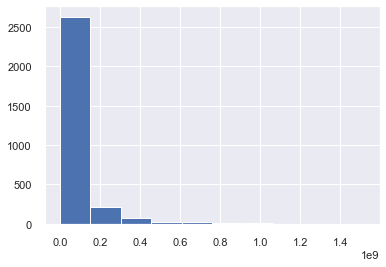

In [286]:
# histogram of revenue
plt.hist(df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Density'>

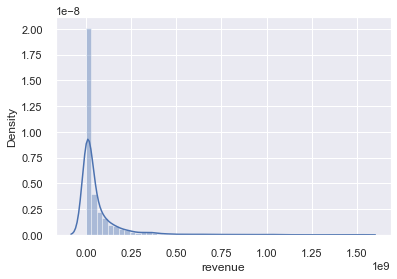

In [287]:
# pdfs
sns.distplot(df['revenue'])

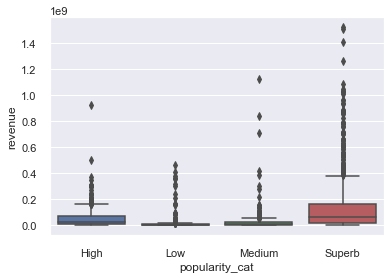

In [288]:
box1 = sns.boxplot(x='popularity_cat', y='revenue', data=df)

In [289]:
# 5.	תייצרו גרפים שיכולים לעזור לכם לבדוק האם קיימים נתוני קיצון. תתארו אותם 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                      3.698500e+03
budget                  2.800000e+07
popularity              6.986878e+00
year                    1.800000e+01
month                   6.000000e+00
runtime                 2.400000e+01
revenue                 6.653940e+07
revenue_rank            7.800000e+01
yearly_revenue_sum      1.739080e+10
revenue_year_percent    6.500000e-01
rev_budg_ratio          3.369925e+00
Art                     3.000000e+00
Camera                  2.000000e+00
Costume & Make-Up       2.000000e+00
Crew                    2.000000e+00
Directing               1.000000e+00
Editing                 2.000000e+00
Lighting                0.000000e+00
Production              7.000000e+00
Sound                   2.000000e+00
Visual Effects          0.000000e+00
Writing                 2.000000e+00
female_cnt              3.000000e+00
male_cnt                8.000000e+00
dtype: float64


<AxesSubplot:xlabel='revenue'>

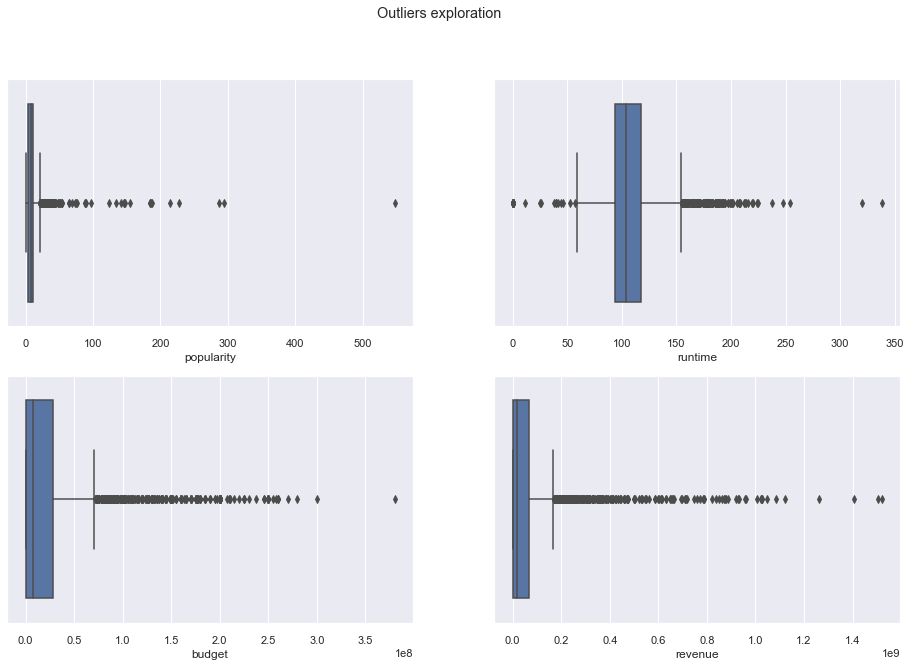

In [290]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Outliers exploration')
sns.boxplot(ax=axes[0, 0], x="popularity", data = df)
sns.boxplot(ax=axes[0, 1], x="runtime", data = df)
sns.boxplot(ax=axes[1, 0], x="budget", data = df)
sns.boxplot(ax=axes[1,1], x="revenue", data = df)

In [291]:
# correlation with the variable of interest
df_corr = df.corr()['revenue'][:-1]

In [292]:
df[df.columns[1:]].corr()['revenue'][:]

budget                  0.752965
popularity              0.461460
year                    0.096776
month                   0.020164
runtime                 0.216380
revenue                 1.000000
revenue_rank           -0.429737
yearly_revenue_sum      0.134839
revenue_year_percent    0.112795
rev_budg_ratio         -0.013482
Art                     0.368459
Camera                  0.305139
Costume & Make-Up       0.314475
Crew                    0.276498
Directing               0.198724
Editing                 0.319733
Lighting                0.259666
Production              0.297867
Sound                   0.306067
Visual Effects          0.350841
Writing                 0.259342
female_cnt              0.279949
male_cnt                0.403462
Name: revenue, dtype: float64

In [293]:
df_corr

id                      0.000610
budget                  0.752965
popularity              0.461460
year                    0.096776
month                   0.020164
runtime                 0.216380
revenue                 1.000000
revenue_rank           -0.429737
yearly_revenue_sum      0.134839
revenue_year_percent    0.112795
rev_budg_ratio         -0.013482
Art                     0.368459
Camera                  0.305139
Costume & Make-Up       0.314475
Crew                    0.276498
Directing               0.198724
Editing                 0.319733
Lighting                0.259666
Production              0.297867
Sound                   0.306067
Visual Effects          0.350841
Writing                 0.259342
female_cnt              0.279949
Name: revenue, dtype: float64

In [295]:
df.budget[df.budget == 0 ] = np.nan
df.runtime[df.runtime == 0 ] = np.nan

In [296]:
df.female_cnt[(df.female_cnt == 0) & (df.male_cnt == 0) ] = np.nan
df.male_cnt[(df.female_cnt == 0) & (df.male_cnt == 0) ] = np.nan

In [297]:
# 6.	תתארו את הנתונים החסרים: אצל איזה משתנים יש נתונים חסרים? כמה?
# Finding the null values.
print(df.isnull().sum())

id                         0
budget                  2023
homepage                   0
original_language          0
original_is_en             0
original_title             0
popularity                 0
popularity_cat             0
release_date               1
year                       1
month                      1
runtime                   27
revenue                 4398
best_seller                0
revenue_rank               0
yearly_revenue_sum        20
revenue_year_percent    4398
rev_budg_ratio          5210
Action                    23
Adventure                 23
Animation                 23
Comedy                    23
Crime                     23
Documentary               23
Drama                     23
Family                    23
Fantasy                   23
Foreign                   23
History                   23
Horror                    23
Music                     23
Mystery                   23
Romance                   23
Science Fiction           23
Thriller      

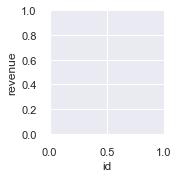

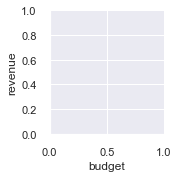

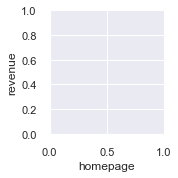

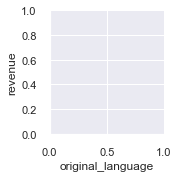

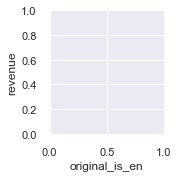

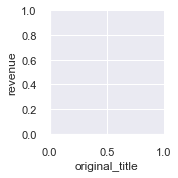

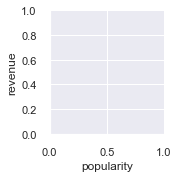

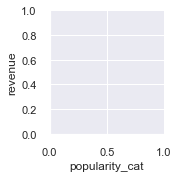

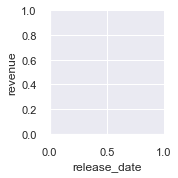

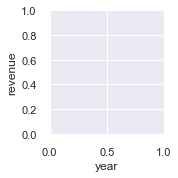

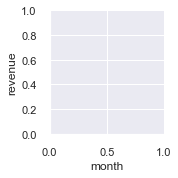

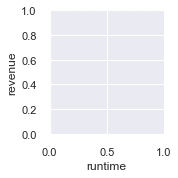

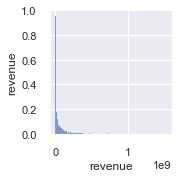

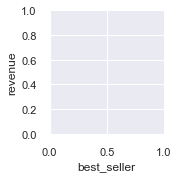

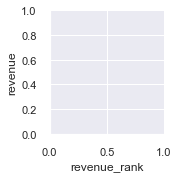

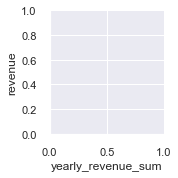

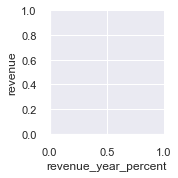

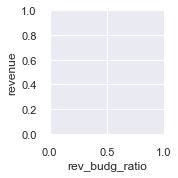

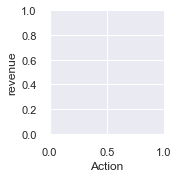

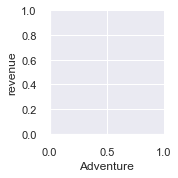

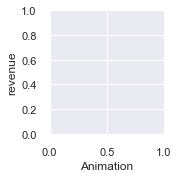

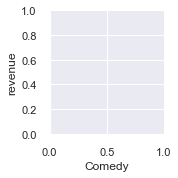

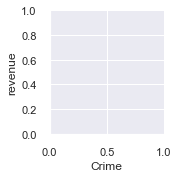

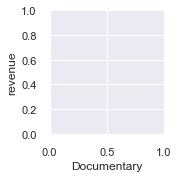

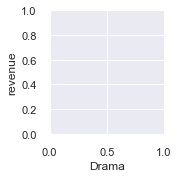

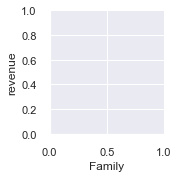

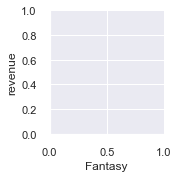

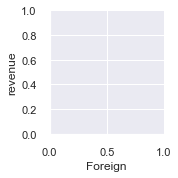

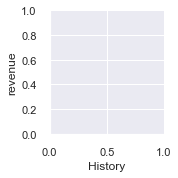

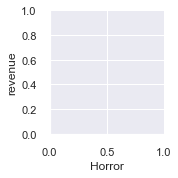

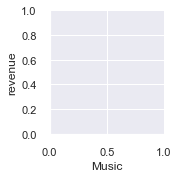

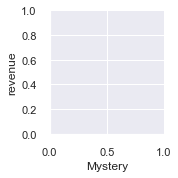

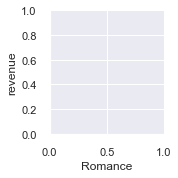

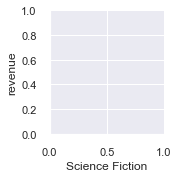

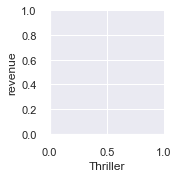

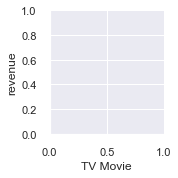

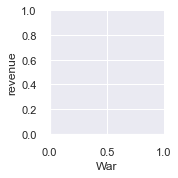

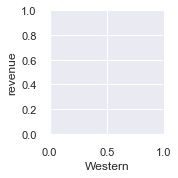

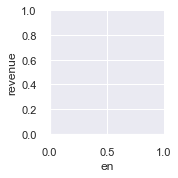

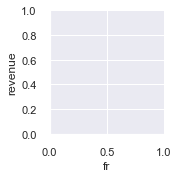

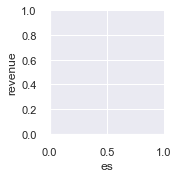

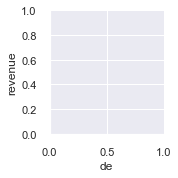

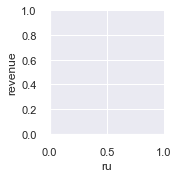

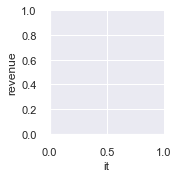

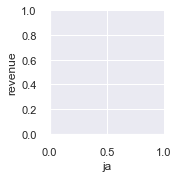

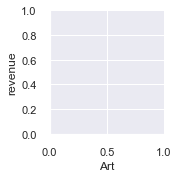

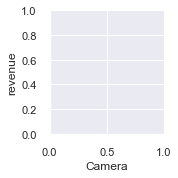

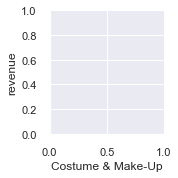

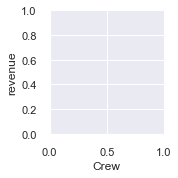

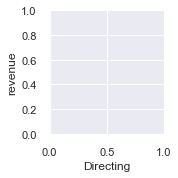

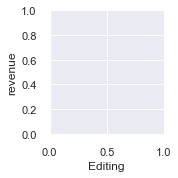

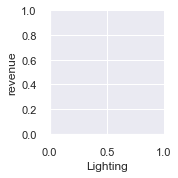

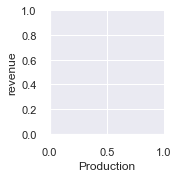

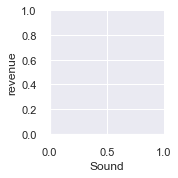

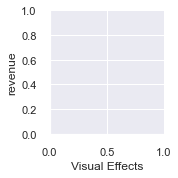

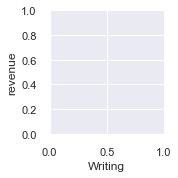

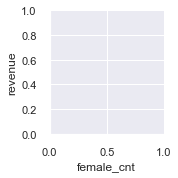

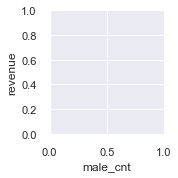

In [298]:
# correlation plots using 'pairplot'
for i in range(0, len(df.columns)):
    sns.pairplot(df, y_vars=['revenue'],x_vars=df.columns[i:i+1])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'revenue_rank'}>,
        <AxesSubplot:title={'center':'yearly_revenue_sum'}>,
        <AxesSubplot:title={'center':'revenue_year_percent'}>],
       [<AxesSubplot:title={'center':'rev_budg_ratio'}>,
        <AxesSubplot:title={'center':'Art'}>,
        <AxesSubplot:title={'center':'Camera'}>,
        <AxesSubplot:title={'center':'Costume & Make-Up'}>,
        <AxesSubplot:title={'center':'Crew'}>],
       [<AxesSubplot:title={'center':'Directing'}>,
        <AxesSubplot:title={'center':'Editing'}>,
        <AxesSubplot:title={'center':'Lighting'}>,
        <AxesSubplot:title={'center':'Production'}>,
        <Ax

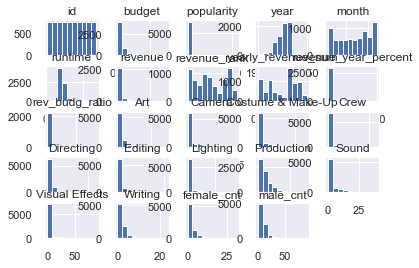

In [299]:
df.hist()

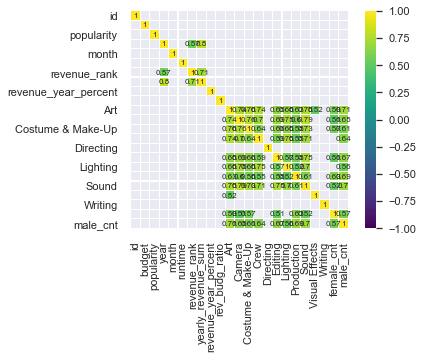

In [300]:
# plotting significant correlation in one plot (heatmap)
corr = df.drop('revenue', axis=1).corr()
sns.heatmap(corr[(corr >=0.5) | (corr <= -0.4)],
           cmap ='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size":8}, square=True);

In [301]:
# 7.	תייצרו מטריצה של חסרים (תייצרו dataframe עם אותם מימדים מטבלת המקור ותאים שיש חסרים תשימו ערך של אחד ובאלה שיש נתונים ערך אפס). תציגו את המטריצה בגרף heatmap. – לבדוק 0 ו 1
# qustion 7 , missing 
copy_df = copy.deepcopy(df)

for column_copy in copy_df:
    copy_df[column_copy] = np.where(copy_df[column_copy].notna(),0 , 1)

for column_copy in copy_df:
    print(copy_df[column_copy].isin([1]).any())

False
True
False
False
False
False
False
False
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [302]:
copy_df.loc[copy_df['revenue'].isin([1])]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
3000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


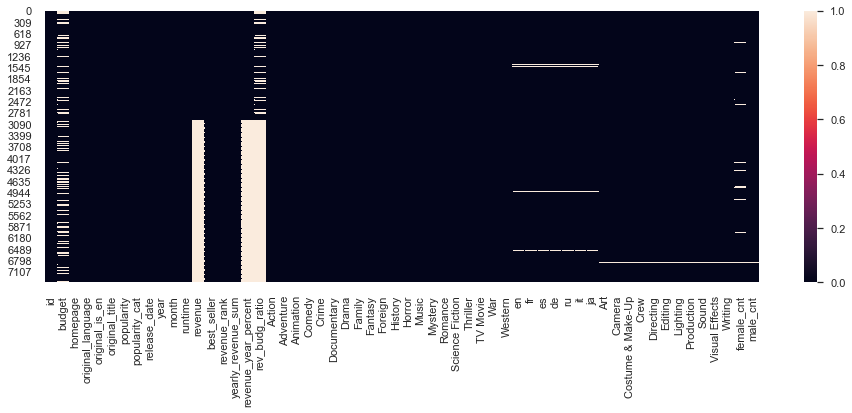

In [303]:
plt.figure(figsize=(16,5))
heat_map_missing = sns.heatmap(copy_df)

In [304]:
# חלק 3 - ניקוי הנתונים# 

In [305]:
# 1.	במשתנים שבהם מוצאים ערכי קיצון תבדקו את ההתפלגות של המשתנה עם ובלי ערכי הקיצון. האם ההתפלגות משתנה ? 

In [307]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                      3.698500e+03
budget                  3.494668e+07
popularity              6.986878e+00
year                    1.800000e+01
month                   6.000000e+00
runtime                 2.400000e+01
revenue                 6.653940e+07
revenue_rank            7.800000e+01
yearly_revenue_sum      1.739080e+10
revenue_year_percent    6.500000e-01
rev_budg_ratio          3.369925e+00
Art                     3.000000e+00
Camera                  2.000000e+00
Costume & Make-Up       2.000000e+00
Crew                    2.000000e+00
Directing               1.000000e+00
Editing                 2.000000e+00
Lighting                0.000000e+00
Production              7.000000e+00
Sound                   2.000000e+00
Visual Effects          0.000000e+00
Writing                 2.000000e+00
female_cnt              3.000000e+00
male_cnt                8.000000e+00
dtype: float64


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'revenue_rank'}>,
        <AxesSubplot:title={'center':'yearly_revenue_sum'}>,
        <AxesSubplot:title={'center':'revenue_year_percent'}>],
       [<AxesSubplot:title={'center':'rev_budg_ratio'}>,
        <AxesSubplot:title={'center':'Art'}>,
        <AxesSubplot:title={'center':'Camera'}>,
        <AxesSubplot:title={'center':'Costume & Make-Up'}>,
        <AxesSubplot:title={'center':'Crew'}>],
       [<AxesSubplot:title={'center':'Directing'}>,
        <AxesSubplot:title={'center':'Editing'}>,
        <AxesSubplot:title={'center':'Lighting'}>,
        <AxesSubplot:title={'center':'Production'}>,
        <Ax

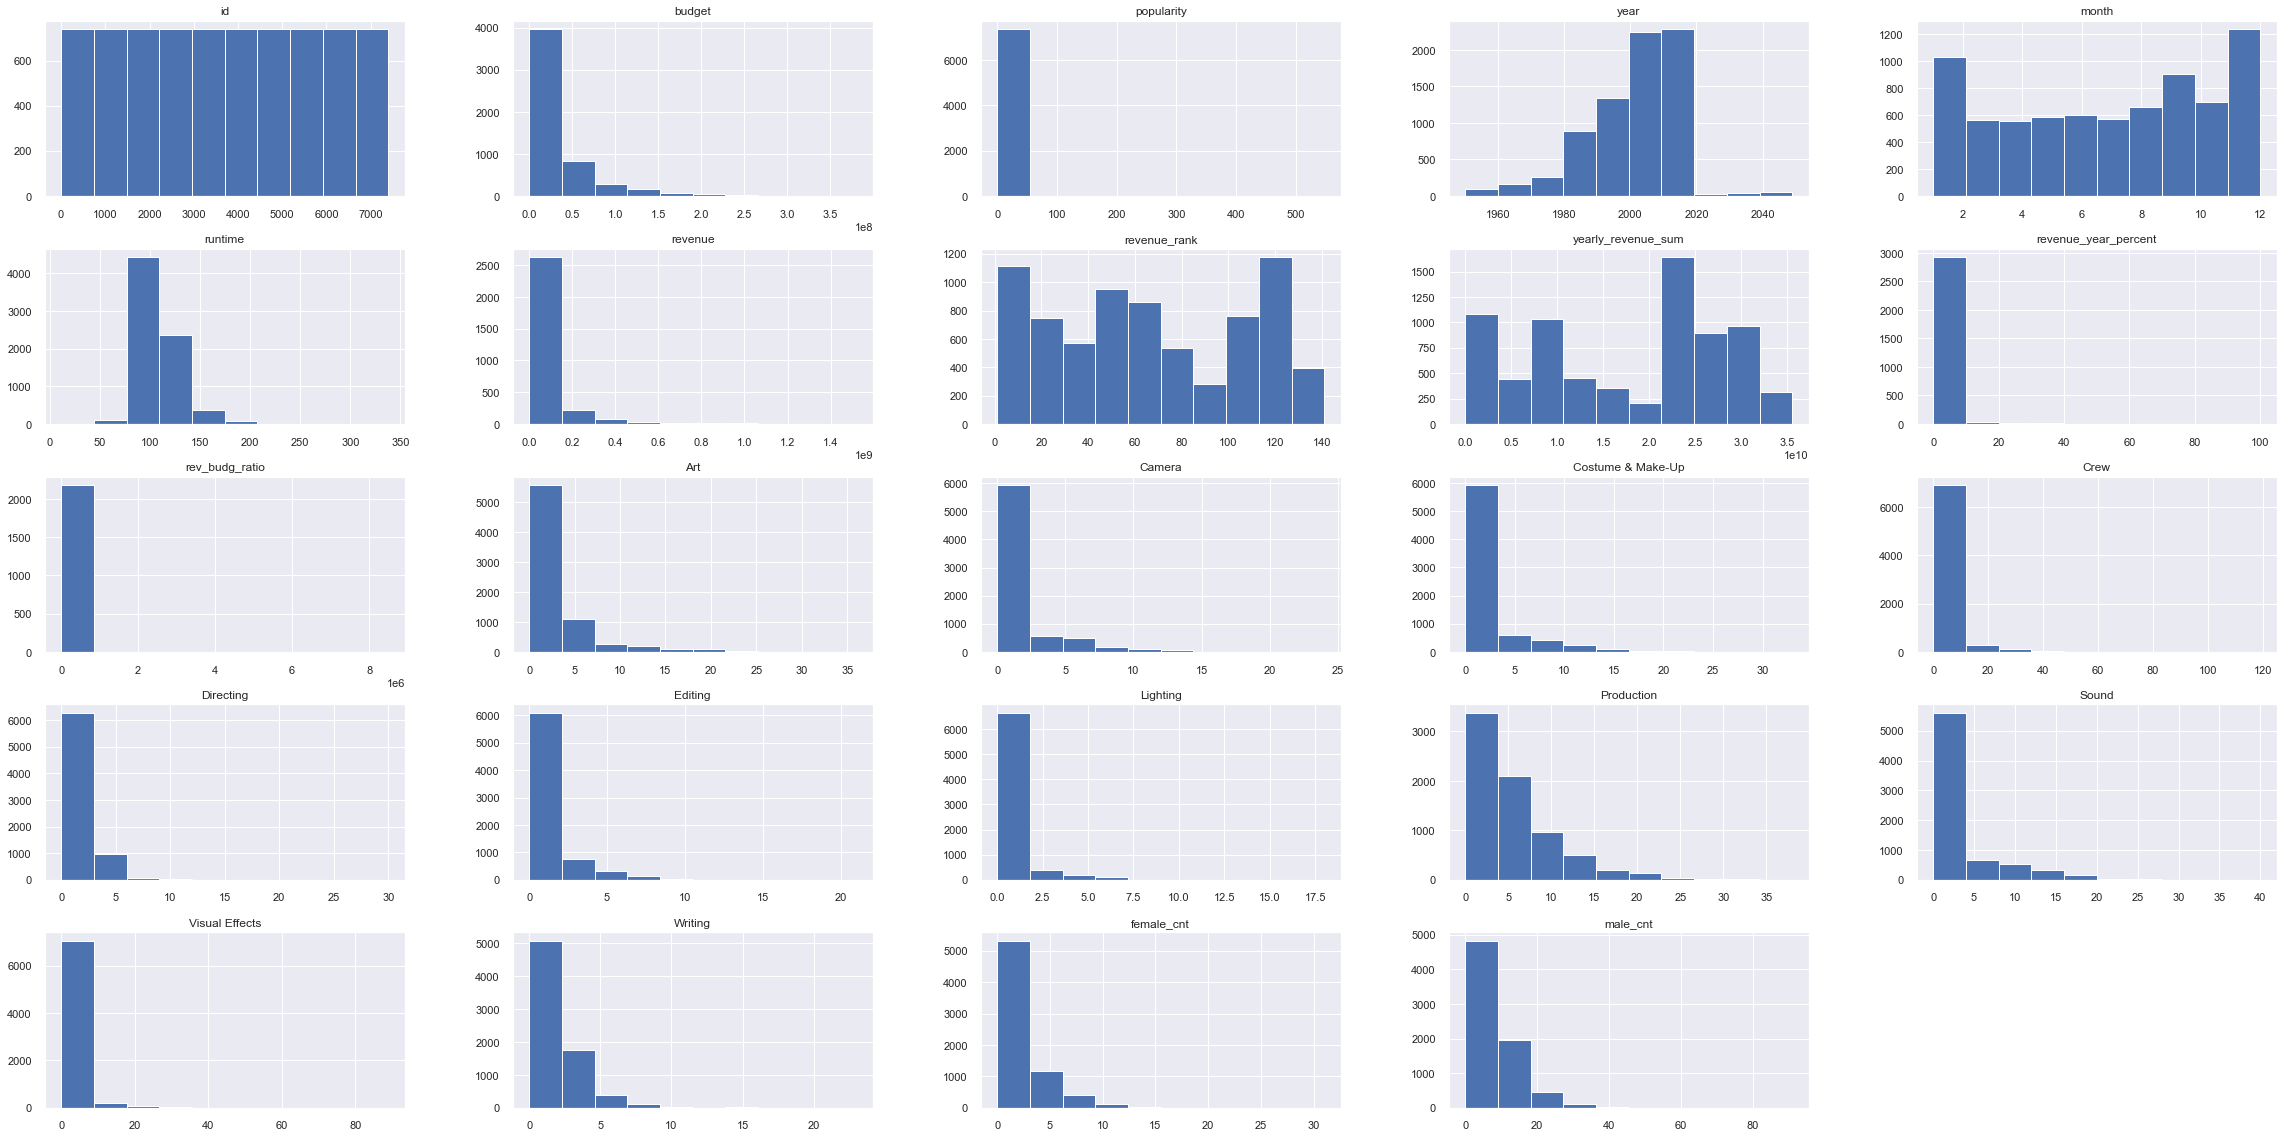

In [308]:
df.hist(figsize=(40, 20))

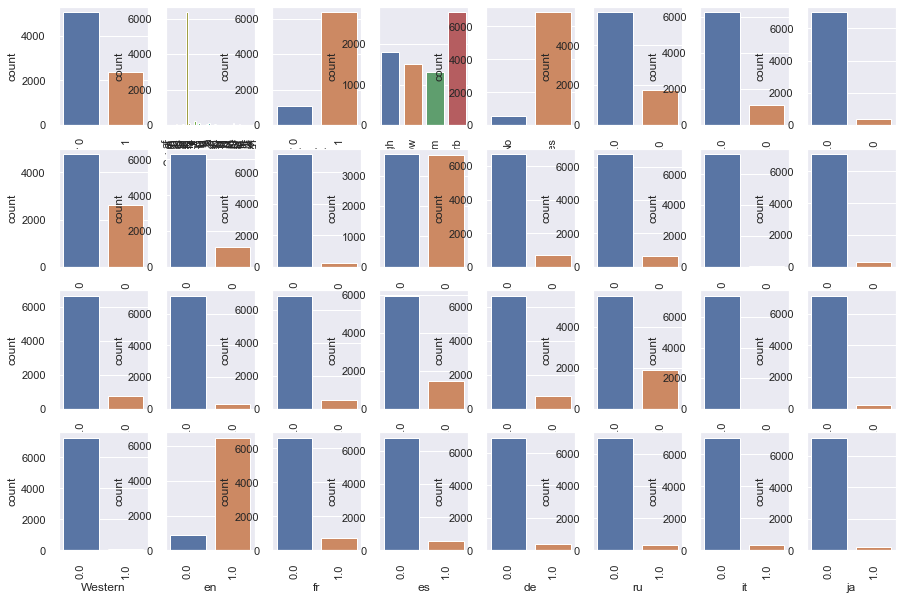

In [309]:
fig, ax = plt.subplots(4, 8, figsize=(15,10))
for variable, subplot in zip(categorical_update, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

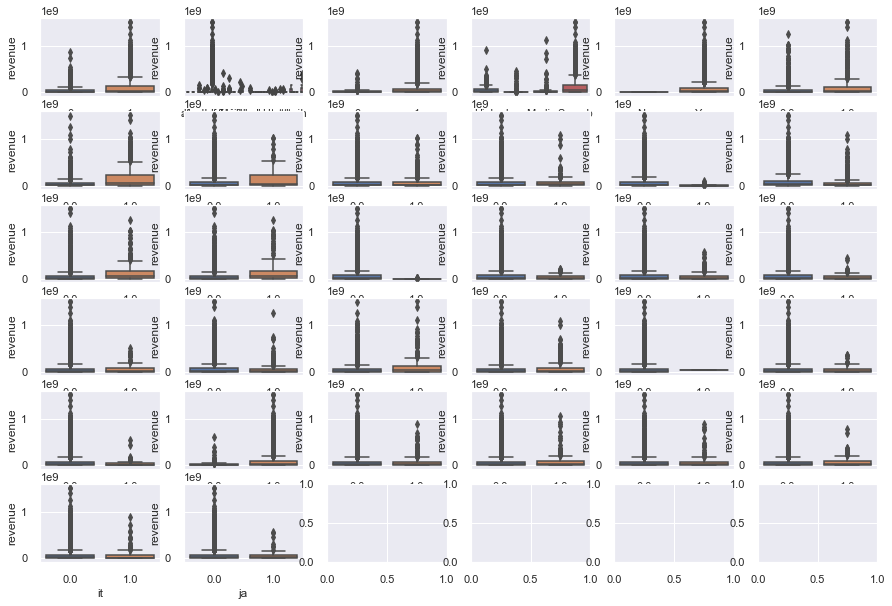

In [310]:
fig, ax = plt.subplots(6, 6, figsize=(15, 10))
for var, subplot in zip(categorical_update, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=df, ax=subplot)

In [311]:
# 3

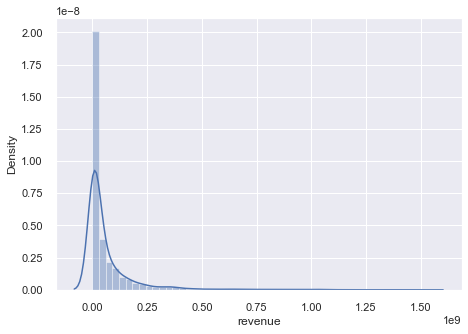

In [312]:
# 1 Plot the Distribution plots for the features
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['revenue'])
plt.show()

<AxesSubplot:xlabel='revenue'>

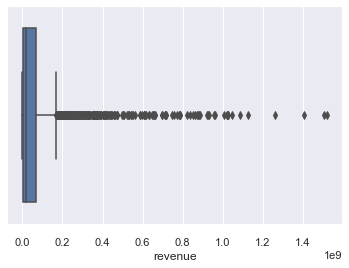

In [313]:
# 2 
sns.boxplot(df['revenue'])

In [314]:
# 3  Finding the IQR
percentile25_revenue = df['revenue'].quantile(0.25)
percentile75_revenue = df['revenue'].quantile(0.75)
IQR_revenue = percentile75_revenue - percentile25_revenue
print(IQR_revenue)

66539395.25


In [315]:
# 4 Finding upper and lower limit
upper_limit_revenue = percentile75_revenue + 1.5 * IQR_revenue
lower_limit_revenue = percentile25_revenue - 1.5 * IQR_revenue

In [316]:
# 5 Finding Outliers
df[df['revenue'] > upper_limit_revenue]
df[df['revenue'] < lower_limit_revenue]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt


In [317]:
# 6 Trimming
new_df_revenue = df[df['revenue'] < upper_limit_revenue]
new_df_revenue.shape

(2685, 58)

In [318]:
# 7 Capping
new_df_cap_revenue = df.copy()
new_df_cap_revenue['revenue'] = np.where(
    new_df_cap_revenue['revenue'] > upper_limit_revenue,
    upper_limit_revenue,
    np.where(
        new_df_cap_revenue['revenue'] < lower_limit_revenue,
        lower_limit_revenue,
        new_df_cap_revenue['revenue']
    )
)

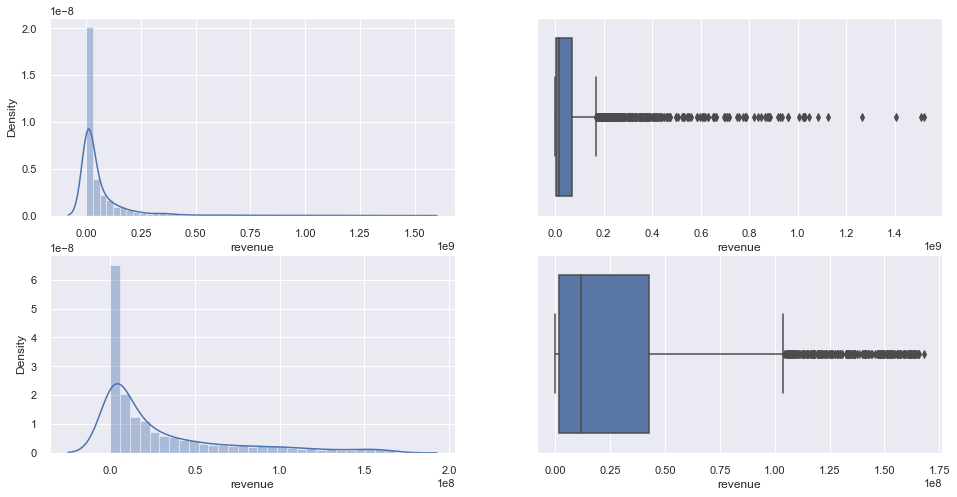

In [319]:
# 8 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['revenue'])
plt.subplot(2,2,2)
sns.boxplot(df['revenue'])
plt.subplot(2,2,3)
sns.distplot(new_df_revenue['revenue'])
plt.subplot(2,2,4)
sns.boxplot(new_df_revenue['revenue'])
plt.show()

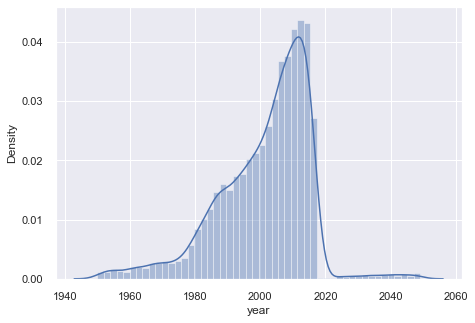

In [320]:
# 1 Plot the Distribution plots for the features
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['year'])
plt.show()

<AxesSubplot:xlabel='year'>

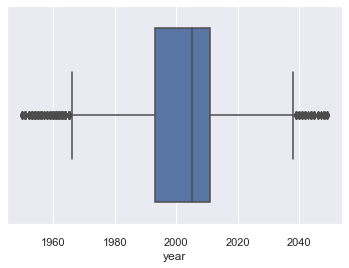

In [321]:
# 2 
sns.boxplot(df['year'])

In [322]:
# 3  Finding the IQR
percentile25_year = df['year'].quantile(0.25)
percentile75_year = df['year'].quantile(0.75)
IQR_year = percentile75_year - percentile25_year
print(IQR_year)


18.0


In [323]:
# 4 Finding upper and lower limit
upper_limit_year = percentile75_year + 1.5 * IQR_year
lower_limit_year = percentile25_year - 1.5 * IQR_year

In [324]:
# 5 Finding Outliers
df[df['year'] > upper_limit_year]
df[df['year'] < lower_limit_year]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
39,40,3800000.0,0,en,1,Major Dundee,3.055936,Medium,4/7/65,1965.0,...,0.0,1.0,3.0,0.0,1.0,1.0,0.0,4.0,0.0,7.0
51,52,12000000.0,0,en,1,The Great Race,4.473327,Medium,7/1/65,1965.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0
61,62,4000000.0,0,en,1,Trapeze,1.801071,Low,5/30/56,1956.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,8.0
68,69,2000000.0,0,en,1,To Kill a Mockingbird,14.284787,Superb,12/25/62,1962.0,...,0.0,4.0,2.0,0.0,8.0,5.0,0.0,3.0,3.0,11.0
257,258,1000000.0,0,en,1,Love Me Tender,1.157582,Low,11/15/56,1956.0,...,0.0,2.0,1.0,0.0,1.0,3.0,0.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,7224,1400000.0,0,en,1,Dial M for Murder,7.853231,High,5/29/54,1954.0,...,1.0,2.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,11.0
7253,7254,15000000.0,0,en,1,Lawrence of Arabia,10.893332,Superb,12/10/62,1962.0,...,5.0,5.0,4.0,1.0,7.0,5.0,0.0,3.0,3.0,19.0
7263,7264,1900000.0,0,en,1,Forbidden Planet,6.379966,High,3/15/56,1956.0,...,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,10.0
7346,7347,5600000.0,0,en,1,Those Magnificent Men in Their Flying Machines...,5.191425,Medium,6/3/65,1965.0,...,0.0,1.0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,5.0


In [325]:
# 6 Trimming
new_df_year = df[df['year'] < upper_limit_year]
new_df_year.shape

(7336, 58)

In [326]:
# 7 Capping
new_df_cap_year = df.copy()
new_df_cap_year['year'] = np.where(
    new_df_cap_year['year'] > upper_limit_year,
    upper_limit_year,
    np.where(
        new_df_cap_year['year'] < lower_limit_year,
        lower_limit_year,
        new_df_cap_year['year']
    )
)

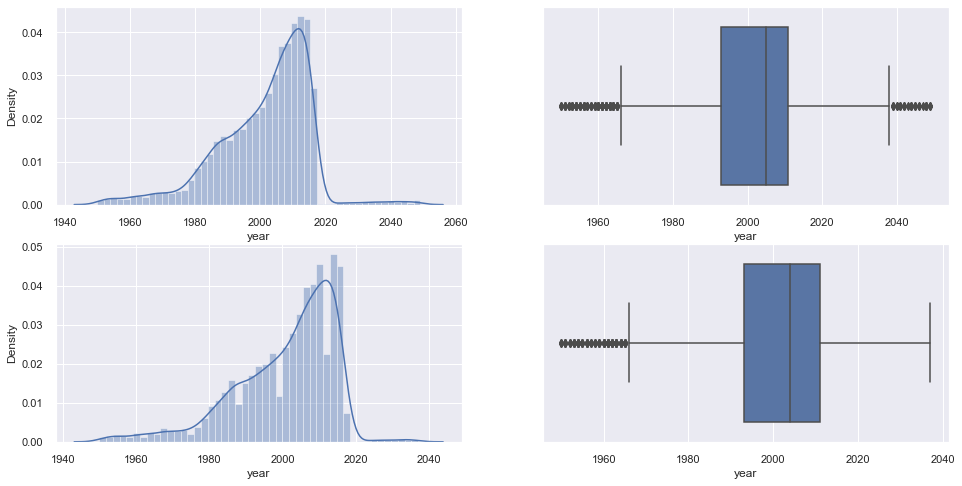

In [327]:
# 8 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['year'])
plt.subplot(2,2,2)
sns.boxplot(df['year'])
plt.subplot(2,2,3)
sns.distplot(new_df_year['year'])
plt.subplot(2,2,4)
sns.boxplot(new_df_year['year'])
plt.show()

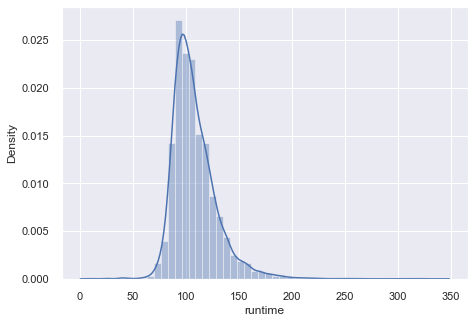

In [328]:
# 1 Plot the Distribution plots for the features
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['runtime'])
plt.show()

<AxesSubplot:xlabel='runtime'>

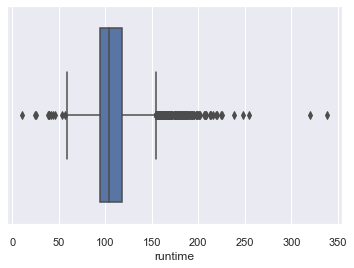

In [329]:
# 2 
sns.boxplot(df['runtime'])

In [330]:
# 3  Finding the IQR
percentile25_runtime = df['runtime'].quantile(0.25)
percentile75_runtime = df['runtime'].quantile(0.75)
IQR_runtime = percentile75_runtime - percentile25_runtime
print(IQR_runtime)

24.0


In [331]:
# 4 Finding upper and lower limit
upper_limit_runtime = percentile75_runtime + 1.5 * IQR_runtime
lower_limit_runtime = percentile25_runtime - 1.5 * IQR_runtime

In [332]:
# 5 Finding Outliers
df[df['runtime'] > upper_limit_runtime]
df[df['runtime'] < lower_limit_runtime]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
224,225,NaN,1,en,1,Gary Gulman: It's About Time,0.410738,Low,5/1/16,2016.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
775,776,NaN,1,en,1,Born to Be Wild,2.923870,Low,4/8/11,2011.0,...,1.0,1.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,4.0
1020,1021,NaN,0,en,1,The Living Sea,1.081517,Low,2/1/95,1995.0,...,0.0,1.0,1.0,0.0,3.0,1.0,0.0,2.0,0.0,5.0
2577,2578,NaN,0,en,1,"The Life and Death of 9413, a Hollywood Extra",0.209191,Low,6/16/28,2028.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3875,3876,75000.0,0,en,1,Lights of New York,0.251353,Low,7/18/28,2028.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,4.0
4266,4267,3000000.0,0,en,1,Mickey's Christmas Carol,11.742804,Superb,10/19/83,1983.0,...,0.0,1.0,2.0,0.0,2.0,1.0,1.0,7.0,0.0,3.0
5279,5280,NaN,0,en,1,Winnie the Pooh and a Day for Eeyore,1.235038,Low,1/1/83,1983.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5602,5603,NaN,0,en,1,Michael Jordan to the Max,2.047132,Low,5/5/00,2000.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
5707,5708,200000.0,1,en,1,Dr. Horrible's Sing-Along Blog,8.927994,High,7/15/08,2008.0,...,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0
6241,6242,NaN,0,en,1,Everest,2.096835,Low,3/6/98,1998.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0


In [333]:
# 6 Trimming
new_df_runtime = df[df['runtime'] < upper_limit_runtime]
new_df_runtime.shape

(7112, 58)

In [334]:
# 7 Capping
new_df_cap_runtime = df.copy()
new_df_cap_runtime['runtime'] = np.where(
    new_df_cap_runtime['runtime'] > upper_limit_runtime,
    upper_limit_runtime,
    np.where(
        new_df_cap_runtime['runtime'] < lower_limit_runtime,
        lower_limit_runtime,
        new_df_cap_runtime['runtime']
    )
)

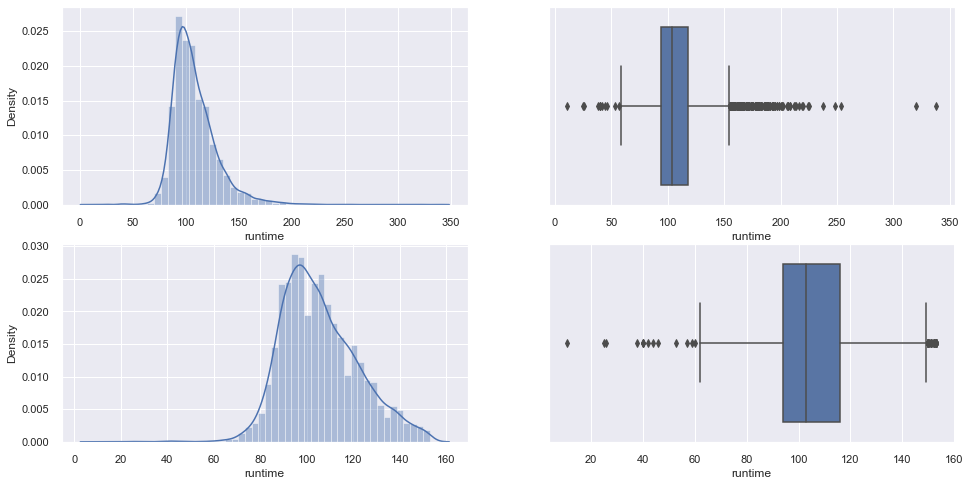

In [335]:
# 8 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['runtime'])
plt.subplot(2,2,2)
sns.boxplot(df['runtime'])
plt.subplot(2,2,3)
sns.distplot(new_df_runtime['runtime'])
plt.subplot(2,2,4)
sns.boxplot(new_df_runtime['runtime'])
plt.show()

In [336]:
# 2.	תייצרו גרף scatter עם המשתנים שבשאלה הקודמת ב-X ומשתנה המטרה ב-Y. האם ערכי קיצון במשתנה ה-X משפיעה על ההתנהגות של משתנה ה-Y? האם רואים שוני עם או בלי ערכי הקיצון?

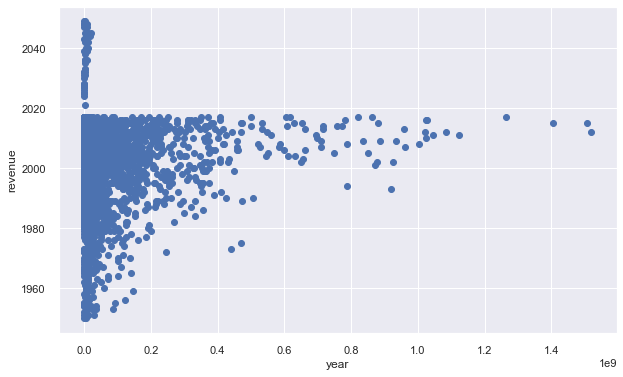

In [337]:
# Scatterplot
# https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['revenue'], df['year'])
ax.set_xlabel('year')
ax.set_ylabel('revenue')
plt.show()

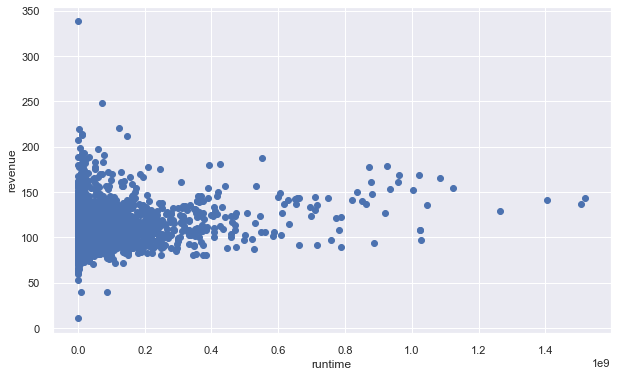

In [338]:
# Scatterplot
# https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['revenue'], df['runtime'])
ax.set_xlabel('runtime')
ax.set_ylabel('revenue')
plt.show()

In [339]:
# # 3.	באיזה משתנים הייתם מוחקים את ערכי הקיצון? איך הייתם מוחקים אותם? נמקו. 
# "I would delete outliers in runtime"

In [340]:
# 4.	תפעלו על הנתונים לפי מה שהגדרתם בשאלה הקודמת. 

In [341]:
df2 = df.copy()
df2

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
0,1,14000000.0,0,en,1,Hot Tub Time Machine 2,6.575393,High,2/20/15,2015.0,...,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,0.0,13.0
1,2,40000000.0,0,en,1,The Princess Diaries 2: Royal Engagement,8.248895,High,8/6/04,2004.0,...,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,4.0,4.0
2,3,3300000.0,1,en,1,Whiplash,64.299988,Superb,10/10/14,2014.0,...,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,4.0,11.0
3,4,1200000.0,1,hi,0,Kahaani,3.174936,Medium,3/9/12,2012.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0
4,5,NaN,0,ko,0,????,1.148070,Low,2/5/09,2009.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,7394,42000000.0,0,en,1,Original Sin,9.970359,Superb,8/3/01,2001.0,...,0.0,1.0,1.0,0.0,3.0,2.0,0.0,3.0,3.0,7.0
7394,7395,19000000.0,0,en,1,Without a Paddle,6.046516,High,8/20/04,2004.0,...,16.0,4.0,9.0,2.0,13.0,16.0,7.0,6.0,7.0,22.0
7395,7396,16000000.0,0,en,1,The Verdict,9.596883,Superb,12/8/82,1982.0,...,0.0,1.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,9.0
7396,7397,2000000.0,0,en,1,It Follows,20.359337,Superb,2/4/15,2015.0,...,2.0,2.0,3.0,1.0,6.0,2.0,4.0,1.0,0.0,6.0


In [342]:
# 	3.2 נתונים חסרים

In [343]:
# 1.	עבור כל משתנה עם נתונים חסרים, תראו את ההתפלגות של משתנים אחרים עם או בלי חסרים. השתמשו במטריצת החסרים שייצרתם בחלק 2, שאלה 7 עבור החיווי של יש/אין חסר. עבור ההתפלגות, תשתמשו בהיסטוגרמה או בגרף density עם קטגוריה/צבע לפי החיווי.

In [344]:
#Finding the null values.
print(df.isnull().sum())

# # Dropping the missing values.
# df = df.dropna() 
# df.count()

id                         0
budget                  2023
homepage                   0
original_language          0
original_is_en             0
original_title             0
popularity                 0
popularity_cat             0
release_date               1
year                       1
month                      1
runtime                   27
revenue                 4398
best_seller                0
revenue_rank               0
yearly_revenue_sum        20
revenue_year_percent    4398
rev_budg_ratio          5210
Action                    23
Adventure                 23
Animation                 23
Comedy                    23
Crime                     23
Documentary               23
Drama                     23
Family                    23
Fantasy                   23
Foreign                   23
History                   23
Horror                    23
Music                     23
Mystery                   23
Romance                   23
Science Fiction           23
Thriller      

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'homepage'}>,
        <AxesSubplot:title={'center':'original_language'}>,
        <AxesSubplot:title={'center':'original_is_en'}>,
        <AxesSubplot:title={'center':'original_title'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'popularity_cat'}>],
       [<AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'best_seller'}>,
        <AxesSubplot:title={'center':'revenue_rank'}>,
        <AxesSubplot:title={'center':'yearly_revenue_sum'}>],
       [<AxesSubplot:title={'center':'revenue_year_percent'}>,
        <AxesSubplot:title={'center':'rev_budg_ratio'}>,
        <AxesSubplot:title={'

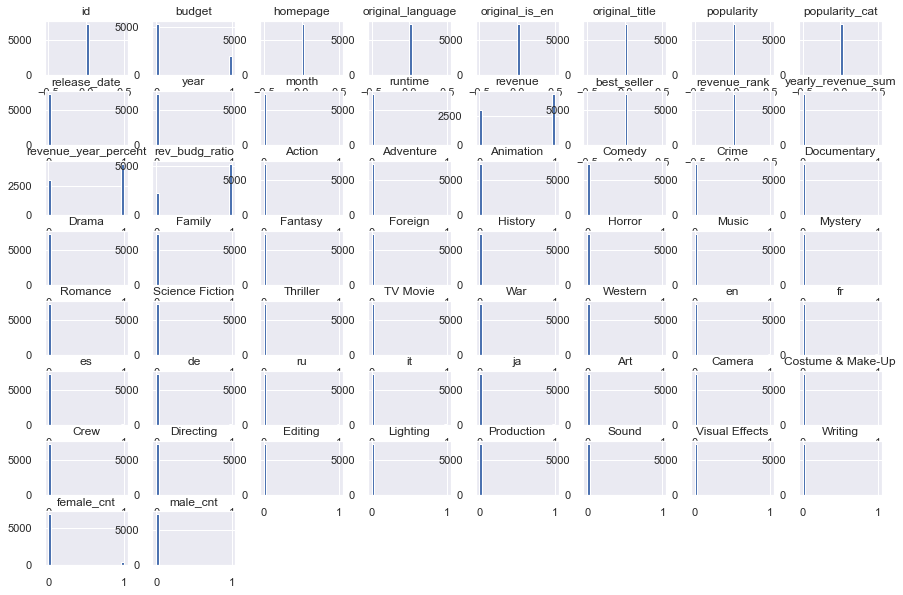

In [345]:
copy_df.hist(bins=30, figsize=(15, 10))

In [346]:
copy_df.loc[copy_df['revenue'].isin([1])]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
3000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
# Concentration indices , Univariate analysis
copy_df_desc = copy_df.describe()
# Dispersion indices
copy_df_desc

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.0,7398.000000,7398.0,7398.0,7398.0,7398.0,7398.0,7398.0,7398.000000,7398.000000,...,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,0.0,0.273452,0.0,0.0,0.0,0.0,0.0,0.0,0.000135,0.000135,...,0.005137,0.005137,0.005137,0.005137,0.005137,0.005137,0.005137,0.005137,0.051095,0.005137
std,0.0,0.445761,0.0,0.0,0.0,0.0,0.0,0.0,0.011626,0.011626,...,0.071490,0.071490,0.071490,0.071490,0.071490,0.071490,0.071490,0.071490,0.220206,0.071490
min,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

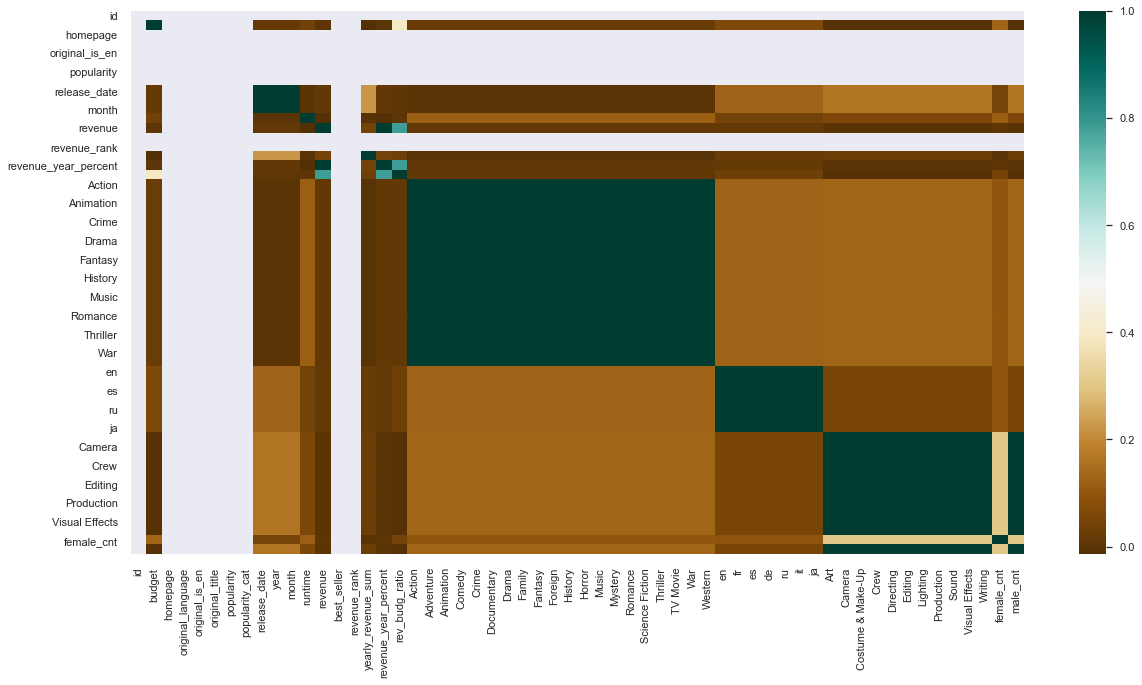

In [348]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
corrMatrix = copy_df.corr(method = 'spearman')
sns.heatmap(corrMatrix ,cmap="BrBG", annot=False)


In [349]:
# 2.	תייצרו טבלה של המשתנים שבהם יש חסרים ותתארו מהו מנגנון היצירה של החסרים (מבוסס על התוצאות של השאלה הקודמת).

In [350]:
copy_df.loc[:,[(copy_df[col] == 0 ).all() for col in copy_df.columns]]

,id,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,best_seller,revenue_rank
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7393,0,0,0,0,0,0,0,0,0
7394,0,0,0,0,0,0,0,0,0
7395,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0


In [352]:
col_without_missing = ['id', 'homepage', 'original_language', 'original_is_en', 'original_title',
                       'popularity', 'popularity_cat', 'best_seller', 'revenue_rank']

In [353]:
copy_df_missing = copy_df

In [354]:
copy_df_missing.drop(['id', 'homepage', 'original_language', 'original_is_en', 'original_title',
                      'popularity', 'popularity_cat', 'best_seller', 'revenue_rank'], axis=1)

,budget,release_date,year,month,runtime,revenue,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,Action,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7394,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7395,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [355]:
# 3.	איזה טכניקה imputation מתאימה לכל משתנה? השתמשו בטכניקה הנבחרת כדי להחליף את החסרים.

In [383]:
df_missing = df.copy()

In [396]:
df_missing

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
0,1,14000000.0,0,en,1,Hot Tub Time Machine 2,6.575393,High,2/20/15,2015.0,...,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,0.0,13.0
1,2,40000000.0,0,en,1,The Princess Diaries 2: Royal Engagement,8.248895,High,8/6/04,2004.0,...,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,4.0,4.0
2,3,3300000.0,1,en,1,Whiplash,64.299988,Superb,10/10/14,2014.0,...,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,4.0,11.0
5,6,8000000.0,0,en,1,Pinocchio and the Emperor of the Night,0.743274,Low,8/6/87,1987.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,4.0,0.0,4.0
6,7,14000000.0,1,en,1,The Possession,7.286477,High,8/30/12,2012.0,...,11.0,4.0,9.0,4.0,8.0,8.0,2.0,4.0,6.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2993,1135654.0,0,en,1,The Thief of Bagdad,3.878515,Medium,3/18/24,2024.0,...,4.0,3.0,1.0,1.0,2.0,3.0,1.0,4.0,0.0,15.0
2993,2994,60000000.0,1,en,1,The Terminal,14.092373,Superb,6/17/04,2004.0,...,3.0,3.0,5.0,3.0,9.0,11.0,4.0,3.0,10.0,21.0
2997,2998,65000000.0,0,en,1,The Long Kiss Goodnight,14.482345,Superb,10/11/96,1996.0,...,1.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,2.0,6.0
2998,2999,42000000.0,1,en,1,Along Came Polly,15.725542,Superb,1/16/04,2004.0,...,10.0,4.0,9.0,3.0,14.0,13.0,0.0,1.0,10.0,18.0


In [397]:
df_missing.isnull().sum()

id                      0
budget                  0
homepage                0
original_language       0
original_is_en          0
original_title          0
popularity              0
popularity_cat          0
release_date            0
year                    0
month                   0
runtime                 0
revenue                 0
best_seller             0
revenue_rank            0
yearly_revenue_sum      0
revenue_year_percent    0
rev_budg_ratio          0
Action                  0
Adventure               0
Animation               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
Foreign                 0
History                 0
Horror                  0
Music                   0
Mystery                 0
Romance                 0
Science Fiction         0
Thriller                0
TV Movie                0
War                     0
Western                 0
en          

In [398]:
# drop rows with missing values
df_missing.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df_missing.shape)

(2101, 58)


In [399]:
print(df.describe())
print("----------------------------------------------------------------------------------")
print(df_missing.describe())

                id        budget    popularity         year        month  \
count  7398.000000  5.375000e+03  7.398000e+03  7397.000000  7397.000000   
mean   3699.500000  3.110802e+07  8.514968e+00  2001.218197     6.842909   
std    2135.762978  4.018026e+07  1.216579e+01    14.006854     3.386287   
min       1.000000  1.000000e+00  1.000000e-06  1950.000000     1.000000   
25%    1850.250000  5.053316e+06  3.933124e+00  1993.000000     4.000000   
50%    3699.500000  1.700000e+07  7.435844e+00  2005.000000     7.000000   
75%    5548.750000  4.000000e+07  1.092000e+01  2011.000000    10.000000   
max    7398.000000  3.800000e+08  5.474883e+02  2049.000000    12.000000   

           runtime       revenue  revenue_rank  yearly_revenue_sum  \
count  7371.000000  3.000000e+03   7398.000000        7.378000e+03   
mean    108.024149  6.672585e+07     66.124899        1.749065e+10   
std      20.725615  1.375323e+08     42.637156        1.042479e+10   
min      11.000000  1.000000e+00   

In [433]:
df.isna().sum()
df_missing.isna().sum()

id                      0
budget                  0
homepage                0
original_language       0
original_is_en          0
original_title          0
popularity              0
popularity_cat          0
release_date            0
year                    0
month                   0
runtime                 0
revenue                 0
best_seller             0
revenue_rank            0
yearly_revenue_sum      0
revenue_year_percent    0
rev_budg_ratio          0
Action                  0
Adventure               0
Animation               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
Foreign                 0
History                 0
Horror                  0
Music                   0
Mystery                 0
Romance                 0
Science Fiction         0
Thriller                0
TV Movie                0
War                     0
Western                 0
en          

In [434]:
# Machine Learning imputation - # MICE method

In [435]:
X_train = df.copy()
X_train.dropna(inplace=True)
y_train = X_train.loc[:,('revenue')]
X_train = X_train.loc[:,('budget','year','month','runtime','revenue', 'yearly_revenue_sum','revenue_year_percent',
                         'rev_budg_ratio', 'Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Documentary', 'Drama',
                         'Family', 'Fantasy', 'Foreign', 'History', 'Horror','Music', 'Mystery', 'Romance', 'Science Fiction',
                         'Thriller', 'TV Movie', 'War', 'Western', 'en', 'fr', 'es', 'de', 'ru', 'it', 'ja', 'Art', 'Camera',
                         'Costume & Make-Up', 'Crew','Directing', 'Editing', 'Lighting','Production', 'Sound', 'Visual Effects',
                         'Writing','female_cnt', 'male_cnt'')]
print(y_train.shape)
print(X_train.shape)
X_train.head()

SyntaxError: EOL while scanning string literal (<ipython-input-435-0efd818296bb>, line 9)

In [ ]:
y_train.head()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train, y_train)  

In [ ]:
X_test = df.np.isnan.loc[(df['revenue'].isnull()),('budget','year'#,'month','runtime','revenue', 'yearly_revenue_sum',
#                                           'revenue_year_percent',
#                          'rev_budg_ratio', 'Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Documentary', 'Drama',
#                          'Family', 'Fantasy', 'Foreign', 'History', 'Horror','Music', 'Mystery', 'Romance', 'Science Fiction',
#                          'Thriller', 'TV Movie', 'War', 'Western', 'en', 'fr', 'es', 'de', 'ru', 'it', 'ja', 'Art', 'Camera',
#                          'Costume & Make-Up', 'Crew','Directing', 'Editing', 'Lighting','Production', 'Sound', 'Visual Effects',
#                          'Writing','female_cnt', 'male_cnt'
                                         )]

y_pred = reg.predict(X_test)

### I had a technical problem using MICE method but I understood the process

In [356]:
# חלק 4 - אחרי ניקוי הנתונים, תחזרו על החלק 2 במלואו.

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    7398 non-null   int64   
 1   budget                5375 non-null   float64 
 2   homepage              7398 non-null   category
 3   original_language     7398 non-null   category
 4   original_is_en        7398 non-null   category
 5   original_title        7398 non-null   object  
 6   popularity            7398 non-null   float64 
 7   popularity_cat        7398 non-null   category
 8   release_date          7397 non-null   object  
 9   year                  7397 non-null   float64 
 10  month                 7397 non-null   float64 
 11  runtime               7371 non-null   float64 
 12  revenue               3000 non-null   float64 
 13  best_seller           7398 non-null   category
 14  revenue_rank          7398 non-null   int64   
 15  year

In [358]:
df.dtypes

id                         int64
budget                   float64
homepage                category
original_language       category
original_is_en          category
original_title            object
popularity               float64
popularity_cat          category
release_date              object
year                     float64
month                    float64
runtime                  float64
revenue                  float64
best_seller             category
revenue_rank               int64
yearly_revenue_sum       float64
revenue_year_percent     float64
rev_budg_ratio           float64
Action                  category
Adventure               category
Animation               category
Comedy                  category
Crime                   category
Documentary             category
Drama                   category
Family                  category
Fantasy                 category
Foreign                 category
History                 category
Horror                  category
Music     

In [359]:
# 1.	תתארו את הנתונים עם סטטיסטיקה תיאורית (תשתמשו במדדי מירכוז ופיזור) 

In [360]:
df.describe()

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,5.375000e+03,7.398000e+03,7397.000000,7397.000000,7371.000000,3.000000e+03,7398.000000,7.378000e+03,3000.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7020.000000,7360.000000
mean,3699.500000,3.110802e+07,8.514968e+00,2001.218197,6.842909,108.024149,6.672585e+07,66.124899,1.749065e+10,1.195270,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.197151,8.251495
std,2135.762978,4.018026e+07,1.216579e+01,14.006854,3.386287,20.725615,1.375323e+08,42.637156,1.042479e+10,4.867114,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.647478,6.635825
min,1.000000,1.000000e+00,1.000000e-06,1950.000000,1.000000,11.000000,1.000000e+00,1.000000,2.382000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,5.053316e+06,3.933124e+00,1993.000000,4.000000,94.000000,2.379808e+06,28.000000,7.851833e+09,0.020000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,1.700000e+07,7.435844e+00,2005.000000,7.000000,104.000000,1.680707e+07,63.000000,2.160382e+10,0.150000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,4.000000e+07,1.092000e+01,2011.000000,10.000000,118.000000,6.891920e+07,106.000000,2.524264e+10,0.670000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000
max,7398.000000,3.800000e+08,5.474883e+02,2049.000000,12.000000,338.000000,1.519558e+09,141.000000,3.556835e+10,100.000000,...,119.000000,30.000000,21.000000,18.000000,38.000000,40.000000,89.000000,23.000000,31.000000,91.000000


In [361]:
df.describe(include='all')

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,5.375000e+03,7398.0,7398,7398.0,7398,7.398000e+03,7398,7397,7397.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7020.000000,7360.000000
unique,NaN,NaN,2.0,44,2.0,7048,NaN,4,4703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,en,1.0,????,NaN,Superb,9/10/10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5032.0,6351,6351.0,52,NaN,2783,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3699.500000,3.110802e+07,NaN,NaN,NaN,NaN,8.514968e+00,NaN,NaN,2001.218197,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.197151,8.251495
std,2135.762978,4.018026e+07,NaN,NaN,NaN,NaN,1.216579e+01,NaN,NaN,14.006854,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.647478,6.635825
min,1.000000,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e-06,NaN,NaN,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,5.053316e+06,NaN,NaN,NaN,NaN,3.933124e+00,NaN,NaN,1993.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,1.700000e+07,NaN,NaN,NaN,NaN,7.435844e+00,NaN,NaN,2005.000000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,4.000000e+07,NaN,NaN,NaN,NaN,1.092000e+01,NaN,NaN,2011.000000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'revenue_rank'}>,
        <AxesSubplot:title={'center':'yearly_revenue_sum'}>,
        <AxesSubplot:title={'center':'revenue_year_percent'}>],
       [<AxesSubplot:title={'center':'rev_budg_ratio'}>,
        <AxesSubplot:title={'center':'Art'}>,
        <AxesSubplot:title={'center':'Camera'}>,
        <AxesSubplot:title={'center':'Costume & Make-Up'}>,
        <AxesSubplot:title={'center':'Crew'}>],
       [<AxesSubplot:title={'center':'Directing'}>,
        <AxesSubplot:title={'center':'Editing'}>,
        <AxesSubplot:title={'center':'Lighting'}>,
        <AxesSubplot:title={'center':'Production'}>,
        <Ax

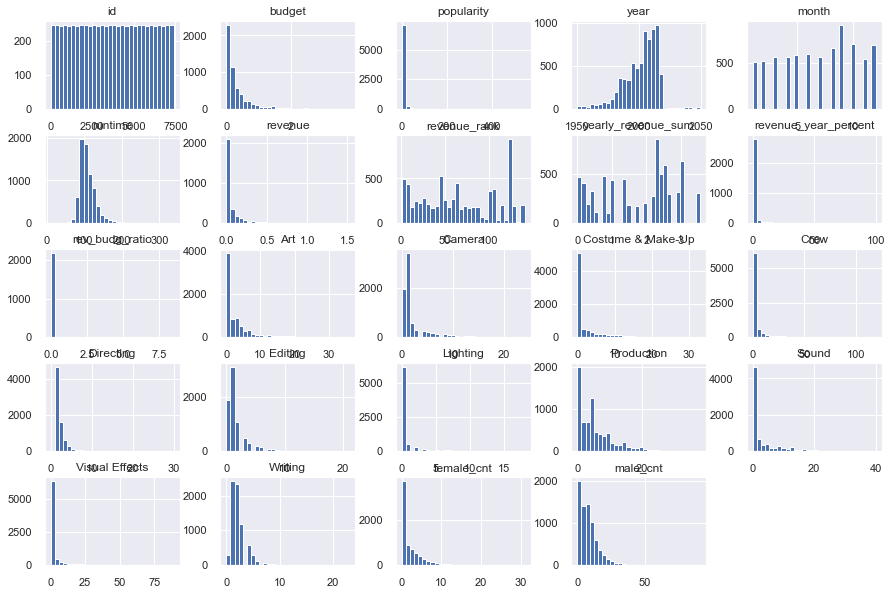

In [362]:
# 2.	תייצרו גרפים המתארים את ההתנהגות של כל משתנה. 
df.hist(bins=30, figsize=(15, 10))


In [363]:
# Concentration indices , Univariate analysis
df_desc = df.describe()
# Dispersion indices
df_desc

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
count,7398.000000,5.375000e+03,7.398000e+03,7397.000000,7397.000000,7371.000000,3.000000e+03,7398.000000,7.378000e+03,3000.000000,...,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7020.000000,7360.000000
mean,3699.500000,3.110802e+07,8.514968e+00,2001.218197,6.842909,108.024149,6.672585e+07,66.124899,1.749065e+10,1.195270,...,2.381658,1.663723,1.512908,0.425136,5.288995,3.056658,1.286957,2.218614,2.197151,8.251495
std,2135.762978,4.018026e+07,1.216579e+01,14.006854,3.386287,20.725615,1.375323e+08,42.637156,1.042479e+10,4.867114,...,5.869035,1.365062,1.736821,1.234043,5.268008,4.512479,4.125757,1.627544,2.647478,6.635825
min,1.000000,1.000000e+00,1.000000e-06,1950.000000,1.000000,11.000000,1.000000e+00,1.000000,2.382000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,5.053316e+06,3.933124e+00,1993.000000,4.000000,94.000000,2.379808e+06,28.000000,7.851833e+09,0.020000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
50%,3699.500000,1.700000e+07,7.435844e+00,2005.000000,7.000000,104.000000,1.680707e+07,63.000000,2.160382e+10,0.150000,...,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,5548.750000,4.000000e+07,1.092000e+01,2011.000000,10.000000,118.000000,6.891920e+07,106.000000,2.524264e+10,0.670000,...,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,3.000000,11.000000
max,7398.000000,3.800000e+08,5.474883e+02,2049.000000,12.000000,338.000000,1.519558e+09,141.000000,3.556835e+10,100.000000,...,119.000000,30.000000,21.000000,18.000000,38.000000,40.000000,89.000000,23.000000,31.000000,91.000000


In [364]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')


,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
id,1.000000,0.003863,0.004630,-0.002626,0.015280,0.001225,0.008310,0.404904,0.000871,0.015251,-0.024396,-0.002674,-0.009075,-0.000098,-0.007883,0.000851,0.004440,-0.002027,0.001425,-0.003929,-0.001568,0.005602,-0.004456,-0.006012
budget,0.003863,1.000000,0.484268,0.146274,0.045135,0.224073,0.707508,0.044032,0.221878,0.416756,-0.065661,0.373172,0.262359,0.284946,0.289600,0.227706,0.340511,0.274615,0.396364,0.303230,0.407877,0.258689,0.400067,0.474865
popularity,0.004630,0.484268,1.000000,0.109707,0.054342,0.165584,0.596192,-0.070451,0.109882,0.479293,0.282906,0.442749,0.415828,0.388605,0.359830,0.308900,0.448285,0.320014,0.472122,0.450054,0.386043,0.279638,0.396799,0.563011
year,-0.002626,0.146274,0.109707,1.000000,-0.037447,-0.001532,-0.034413,0.594850,0.878324,-0.318231,-0.094188,0.092130,0.023010,0.125658,0.152629,0.112537,0.017168,0.134745,0.182454,0.063170,0.208217,0.001116,0.162382,-0.080541
month,0.015280,0.045135,0.054342,-0.037447,1.000000,0.127030,0.034994,-0.012025,-0.028330,0.062917,0.011137,0.062888,0.045923,0.054001,0.019726,0.035899,0.053399,0.031183,0.039385,0.048372,0.020820,0.021809,0.061818,0.056900
runtime,0.001225,0.224073,0.165584,-0.001532,0.127030,1.000000,0.259552,-0.078439,0.001068,0.238724,0.049130,0.199324,0.218446,0.217240,0.156323,0.082730,0.170997,0.131579,0.147278,0.198101,0.066972,0.104232,0.153836,0.195023
revenue,0.008310,0.707508,0.596192,-0.034413,0.034994,0.259552,1.000000,-0.700772,0.026302,0.829861,0.599589,0.387729,0.356693,0.336293,0.321740,0.262704,0.406150,0.289759,0.398575,0.392863,0.368895,0.276503,0.394909,0.558404
revenue_rank,0.404904,0.044032,-0.070451,0.594850,-0.012025,-0.078439,-0.700772,1.000000,0.699143,-0.929040,-0.580874,-0.057059,-0.114587,-0.023282,-0.013153,-0.033329,-0.094943,0.011869,0.055402,-0.090390,0.045450,-0.124768,0.059689,-0.220803
yearly_revenue_sum,0.000871,0.221878,0.109882,0.878324,-0.028330,0.001068,0.026302,0.699143,1.000000,-0.398075,-0.107815,0.074597,-0.005870,0.108231,0.127648,0.078044,0.013164,0.129725,0.203940,0.038935,0.204586,-0.043674,0.190892,-0.099910
revenue_year_percent,0.015251,0.416756,0.479293,-0.318231,0.062917,0.238724,0.829861,-0.929040,-0.398075,1.000000,0.637306,0.327566,0.333683,0.270432,0.244905,0.219805,0.349603,0.193141,0.234004,0.339963,0.238191,0.311134,0.215274,0.533096


<AxesSubplot:>

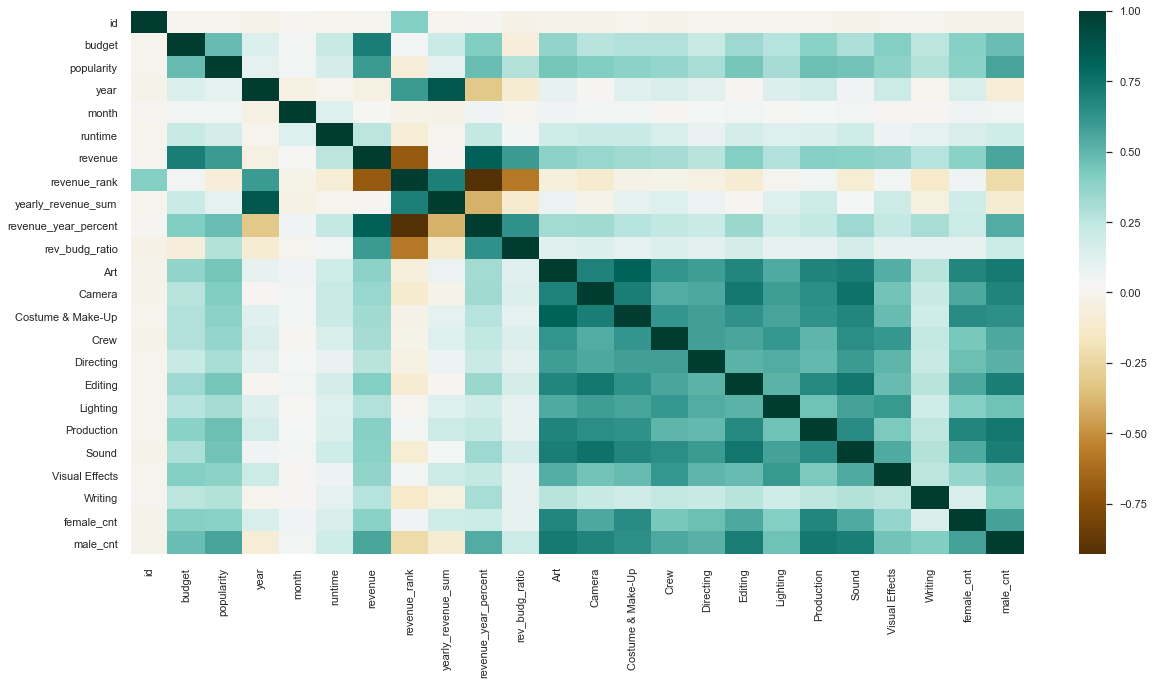

In [365]:
# Finding the relations between the variables.
# 3.	תייצרו מטריצה קורלציות והציגו אותה בגרף 
plt.figure(figsize=(20,10))
corrMatrix = df.corr(method = 'spearman')
sns.heatmap(corrMatrix ,cmap="BrBG", annot=False)

In [366]:
# 4.	תתארו את משתנה המטרה (revenue) - איך הוא מתפלג? האם יש קטגוריות שמראים שוני גדול התפלגות של משתנה המטרה?

def min_max_values(col):
    """The function takes the column name as the argument
    and returns the top & bottom observation in that dataframe
    """
    
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [367]:
min_max_values('revenue')

,1126,347
id,1127,348
budget,2.2e+08,12
homepage,1,0
original_language,en,en
original_is_en,1,1
original_title,The Avengers,The Wind in the Willows
popularity,89.8876,1.41032
popularity_cat,Superb,Low
release_date,4/25/12,10/16/96
year,2012,1996


<AxesSubplot:xlabel='revenue'>

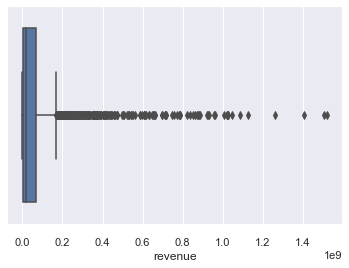

In [368]:
sns.boxplot(x=df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Count'>

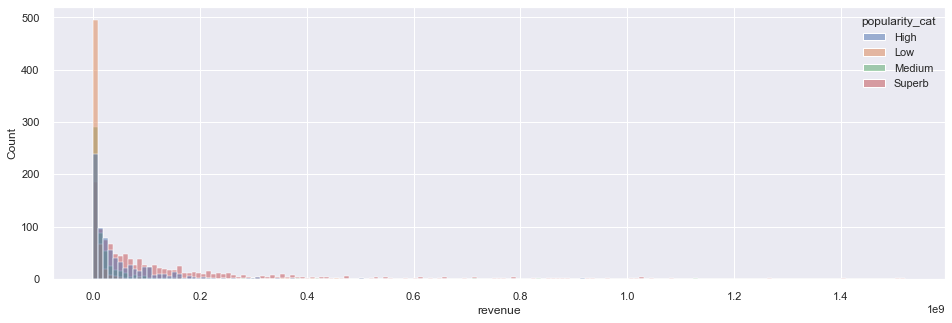

In [369]:
plt.figure(figsize=(16,5))
sns.histplot(x=df['revenue'],hue=df.popularity_cat)

(array([2.632e+03, 2.180e+02, 7.900e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([1.00000000e+00, 1.51955792e+08, 3.03911583e+08, 4.55867374e+08,
        6.07823165e+08, 7.59778956e+08, 9.11734746e+08, 1.06369054e+09,
        1.21564633e+09, 1.36760212e+09, 1.51955791e+09]),
 <BarContainer object of 10 artists>)

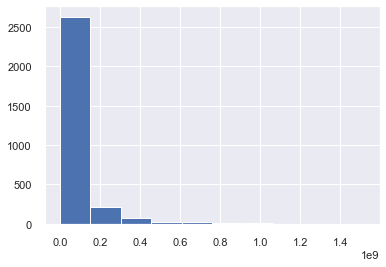

In [370]:
# histogram of revenue
plt.hist(df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Density'>

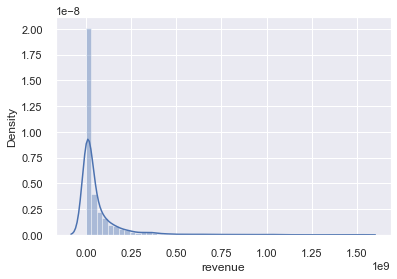

In [371]:
# pdfs
sns.distplot(df['revenue'])

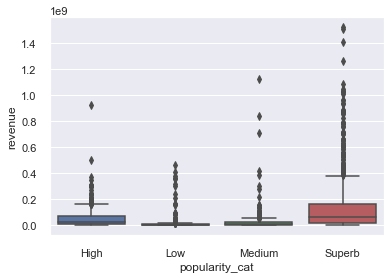

In [372]:
box1 = sns.boxplot(x='popularity_cat', y='revenue', data=df)

In [373]:
# 5.	תייצרו גרפים שיכולים לעזור לכם לבדוק האם קיימים נתוני קיצון. תתארו אותם 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                      3.698500e+03
budget                  3.494668e+07
popularity              6.986878e+00
year                    1.800000e+01
month                   6.000000e+00
runtime                 2.400000e+01
revenue                 6.653940e+07
revenue_rank            7.800000e+01
yearly_revenue_sum      1.739080e+10
revenue_year_percent    6.500000e-01
rev_budg_ratio          3.369925e+00
Art                     3.000000e+00
Camera                  2.000000e+00
Costume & Make-Up       2.000000e+00
Crew                    2.000000e+00
Directing               1.000000e+00
Editing                 2.000000e+00
Lighting                0.000000e+00
Production              7.000000e+00
Sound                   2.000000e+00
Visual Effects          0.000000e+00
Writing                 2.000000e+00
female_cnt              3.000000e+00
male_cnt                8.000000e+00
dtype: float64


<AxesSubplot:xlabel='revenue'>

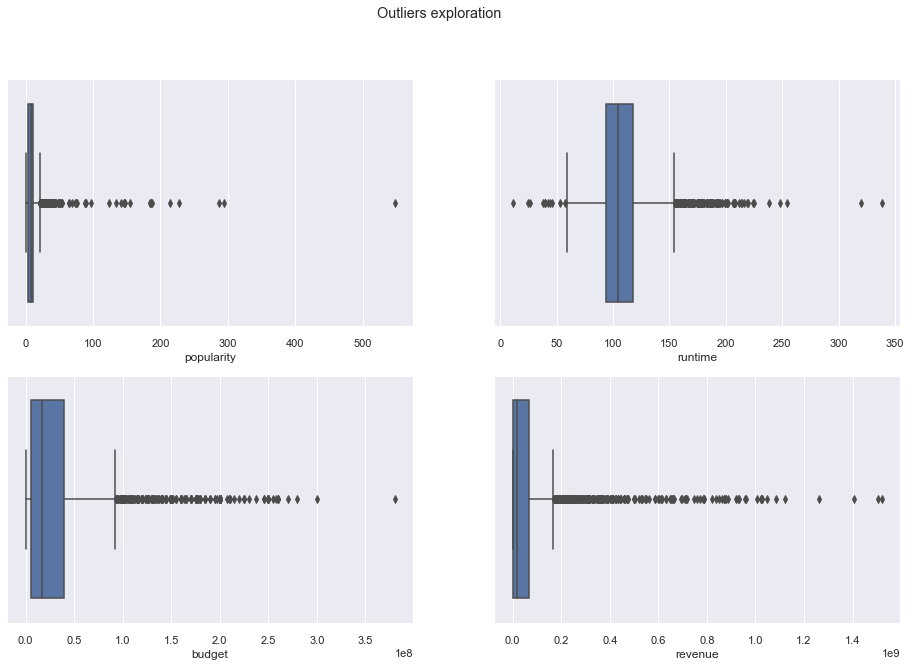

In [374]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Outliers exploration')
sns.boxplot(ax=axes[0, 0], x="popularity", data = df)
sns.boxplot(ax=axes[0, 1], x="runtime", data = df)
sns.boxplot(ax=axes[1, 0], x="budget", data = df)
sns.boxplot(ax=axes[1,1], x="revenue", data = df)

In [375]:
# correlation with the variable of interest
df_corr = df.corr()['revenue'][:-1]

In [376]:
df[df.columns[1:]].corr()['revenue'][:]

budget                  0.739841
popularity              0.461460
year                    0.096776
month                   0.020164
runtime                 0.219688
revenue                 1.000000
revenue_rank           -0.429737
yearly_revenue_sum      0.134839
revenue_year_percent    0.112795
rev_budg_ratio         -0.013482
Art                     0.368459
Camera                  0.305139
Costume & Make-Up       0.314475
Crew                    0.276498
Directing               0.198724
Editing                 0.319733
Lighting                0.259666
Production              0.297867
Sound                   0.306067
Visual Effects          0.350841
Writing                 0.259342
female_cnt              0.271317
male_cnt                0.403462
Name: revenue, dtype: float64

In [377]:
df_corr

id                      0.000610
budget                  0.739841
popularity              0.461460
year                    0.096776
month                   0.020164
runtime                 0.219688
revenue                 1.000000
revenue_rank           -0.429737
yearly_revenue_sum      0.134839
revenue_year_percent    0.112795
rev_budg_ratio         -0.013482
Art                     0.368459
Camera                  0.305139
Costume & Make-Up       0.314475
Crew                    0.276498
Directing               0.198724
Editing                 0.319733
Lighting                0.259666
Production              0.297867
Sound                   0.306067
Visual Effects          0.350841
Writing                 0.259342
female_cnt              0.271317
Name: revenue, dtype: float64

In [378]:
# 6.	תתארו את הנתונים החסרים: אצל איזה משתנים יש נתונים חסרים? כמה?
# Finding the null values.
print(df.isnull().sum())

id                         0
budget                  2023
homepage                   0
original_language          0
original_is_en             0
original_title             0
popularity                 0
popularity_cat             0
release_date               1
year                       1
month                      1
runtime                   27
revenue                 4398
best_seller                0
revenue_rank               0
yearly_revenue_sum        20
revenue_year_percent    4398
rev_budg_ratio          5210
Action                    23
Adventure                 23
Animation                 23
Comedy                    23
Crime                     23
Documentary               23
Drama                     23
Family                    23
Fantasy                   23
Foreign                   23
History                   23
Horror                    23
Music                     23
Mystery                   23
Romance                   23
Science Fiction           23
Thriller      

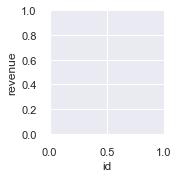

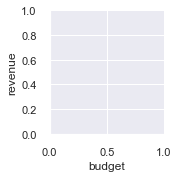

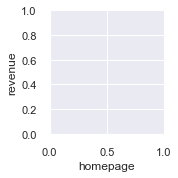

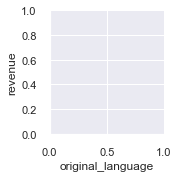

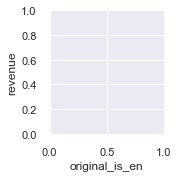

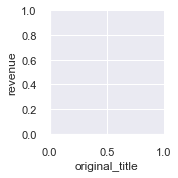

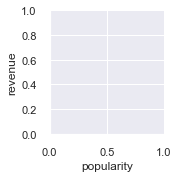

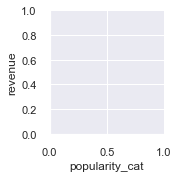

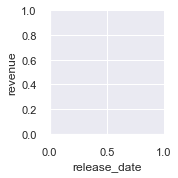

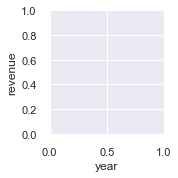

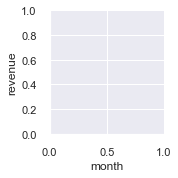

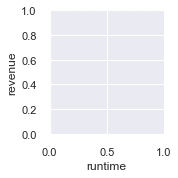

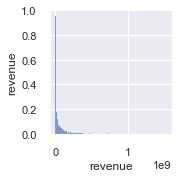

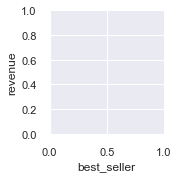

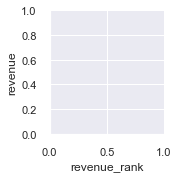

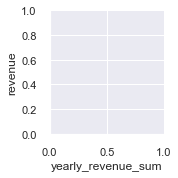

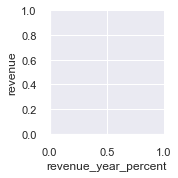

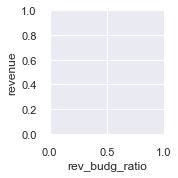

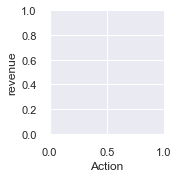

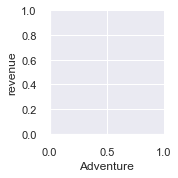

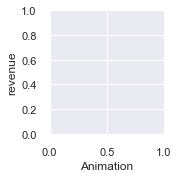

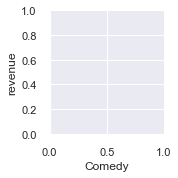

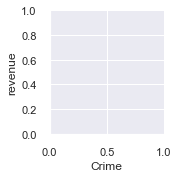

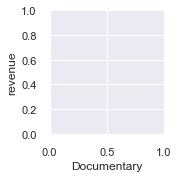

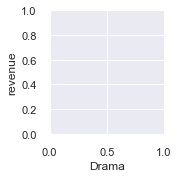

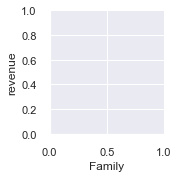

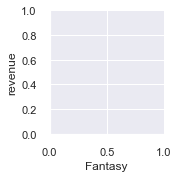

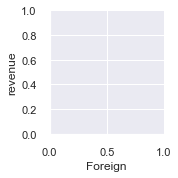

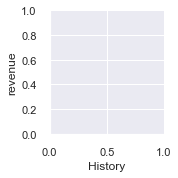

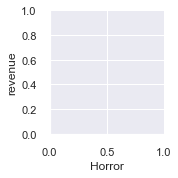

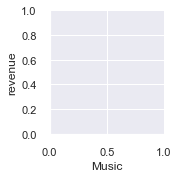

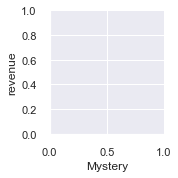

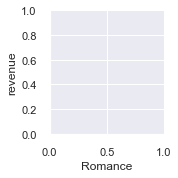

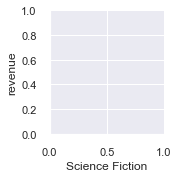

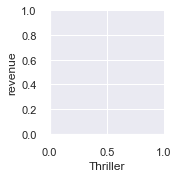

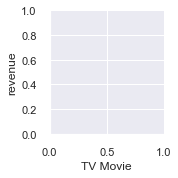

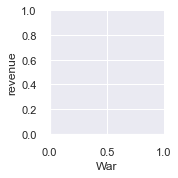

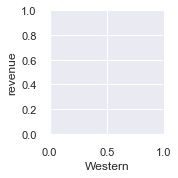

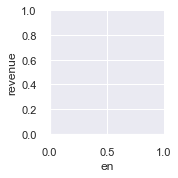

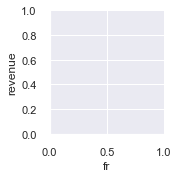

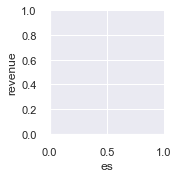

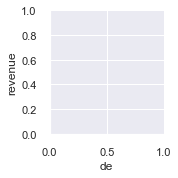

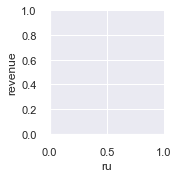

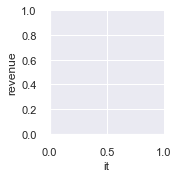

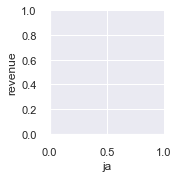

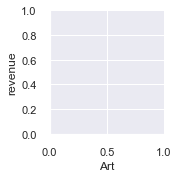

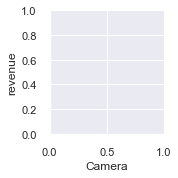

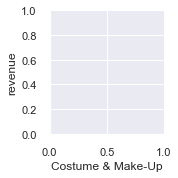

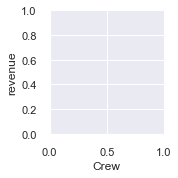

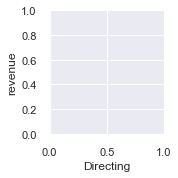

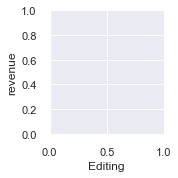

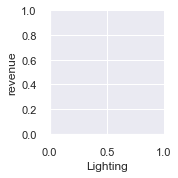

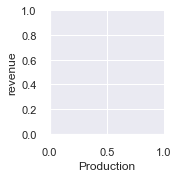

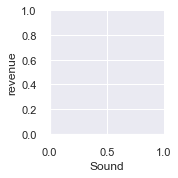

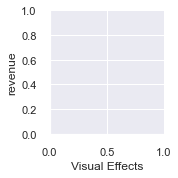

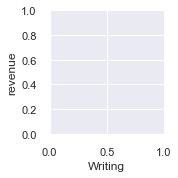

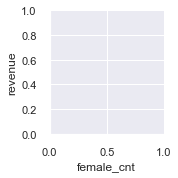

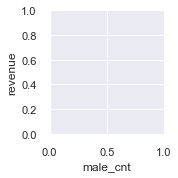

In [379]:
# correlation plots using 'pairplot'
for i in range(0, len(df.columns)):
    sns.pairplot(df, y_vars=['revenue'],x_vars=df.columns[i:i+1])

In [380]:
# 7.	תייצרו מטריצה של חסרים (תייצרו dataframe עם אותם מימדים מטבלת המקור ותאים שיש חסרים תשימו ערך של אחד ובאלה שיש נתונים ערך אפס). תציגו את המטריצה בגרף heatmap. – לבדוק 0 ו 1
# qustion 7 , missing 
copy_df = copy.deepcopy(df)

for column_copy in copy_df:
    copy_df[column_copy] = np.where(copy_df[column_copy].notna(),0 , 1)

for column_copy in copy_df:
    print(copy_df[column_copy].isin([1]).any())

False
True
False
False
False
False
False
False
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [381]:
copy_df.loc[copy_df['revenue'].isin([1])]

,id,budget,homepage,original_language,original_is_en,original_title,popularity,popularity_cat,release_date,year,...,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,female_cnt,male_cnt
3000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


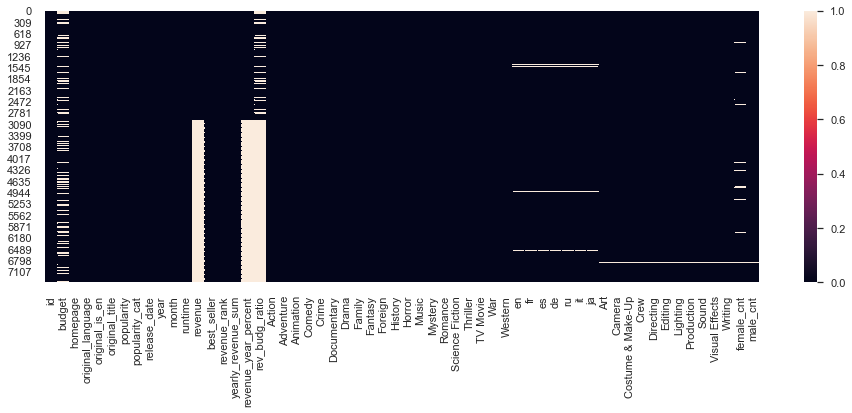

In [382]:
plt.figure(figsize=(16,5))
heat_map_missing = sns.heatmap(copy_df)